## Project - Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

### Background

Sendy was a logistics and fulfillment startup that provided services such as on-demand delivery, freight, warehousing, and fulfillment services to businesses and individuals.

It operated primarily in africa, with a huge presence in Kenya. Its main services included Sendy Transport, Sendy Freight, and Sendy Supply. 

It set itself apart by embedding technology to streamline its logistics processes. Most importantly, it used data analytics to improve operational efficiency and customer satisfaction.

The company, however, announced closure in August 2023 embarking on asset sales after being in existent since 2015.

### Project Objective

The primary objective of this project is to develop a predictive model that estimates the time of arrival (ETA) for orders placed on the Sendy platform. 

The ETA prediction will cover the period from pick-up to drop-off. The dataset provided by Sendy includes detailed order information and rider metrics based on orders made using Sendy's API, web, and mobile applications. 

These platforms connect customers with vetted transporters, offering route optimization and efficient dispatching of orders.

### Data Exploration and Preprocessing

In [384]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
# Load the Train data
TrainData = pd.read_csv('datasets/Train.csv')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [386]:
# Load the Test data
TestData = pd.read_csv('datasets/Test.csv')

TestData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [387]:
# Load the Riders data
RidersData = pd.read_csv('datasets/Riders.csv')

RidersData.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [388]:
# TrainData - Dataset information

TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [389]:
# Test Data - Dataset information

TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [390]:
# RidersData - Dataset information

RidersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [391]:
# Missing values - TrainData

TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [392]:
# Percentage of missing values - TrainData

round(TrainData.isnull().sum() / len(TrainData) * 100, 2)

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

In [393]:
# Missing values - TestData

TestData.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [394]:
# Percentage of missing values - TestData

round(TestData.isnull().sum() / len(TestData) * 100, 2)

Order No                                 0.00
User Id                                  0.00
Vehicle Type                             0.00
Platform Type                            0.00
Personal or Business                     0.00
Placement - Day of Month                 0.00
Placement - Weekday (Mo = 1)             0.00
Placement - Time                         0.00
Confirmation - Day of Month              0.00
Confirmation - Weekday (Mo = 1)          0.00
Confirmation - Time                      0.00
Arrival at Pickup - Day of Month         0.00
Arrival at Pickup - Weekday (Mo = 1)     0.00
Arrival at Pickup - Time                 0.00
Pickup - Day of Month                    0.00
Pickup - Weekday (Mo = 1)                0.00
Pickup - Time                            0.00
Distance (KM)                            0.00
Temperature                             20.33
Precipitation in millimeters            97.18
Pickup Lat                               0.00
Pickup Long                       

Both the Test and Train datasets have missing values in the Temperature and Precipitation columns. The Riders Dataset seems to have 100% complete data. We will handle the missing values in the next phase.

In both Train and Test datasets, we assume that the missing values in precipitation column is that no precipitation occurred at that time. Therefore, the missing values are filled with 0. 

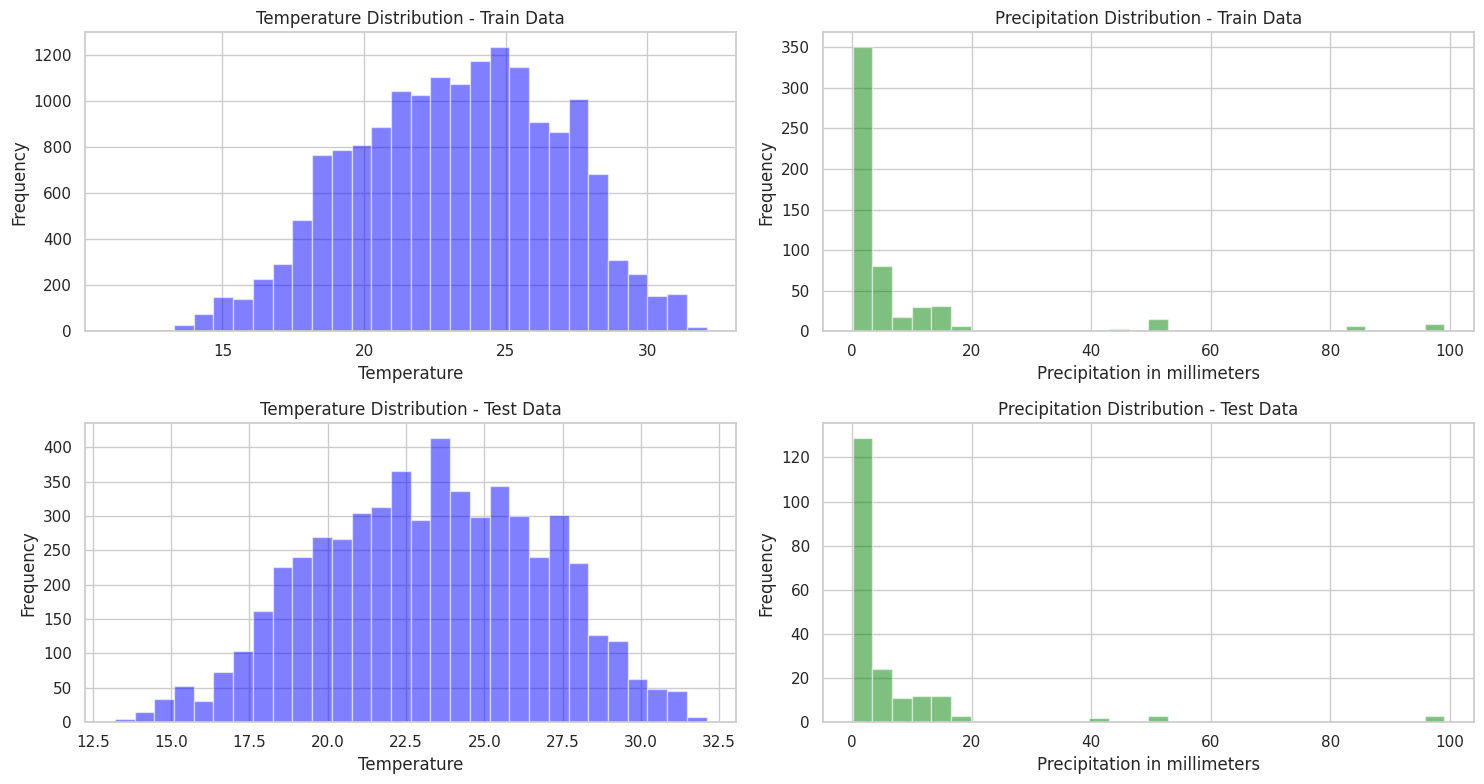

In [395]:
# Temperature and Precipitation Distribution

# Function to plot temperature and precipitation distributions
def plot_temp_precip(axes, data, col, bins, color, title, xlabel, ylabel):
    axes.hist(data[col], bins = bins, color = color, alpha = 0.5)
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

fig, axes = plt.subplots(2, 2, figsize = (15, 8))

plot_temp_precip(axes[0, 0], TrainData, 'Temperature', 30, 'blue', 'Temperature Distribution - Train Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[0, 1], TrainData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Train Data', 'Precipitation in millimeters', 'Frequency')
plot_temp_precip(axes[1, 0], TestData, 'Temperature', 30, 'blue', 'Temperature Distribution - Test Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[1, 1], TestData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Test Data', 'Precipitation in millimeters', 'Frequency')

plt.tight_layout()
plt.show()

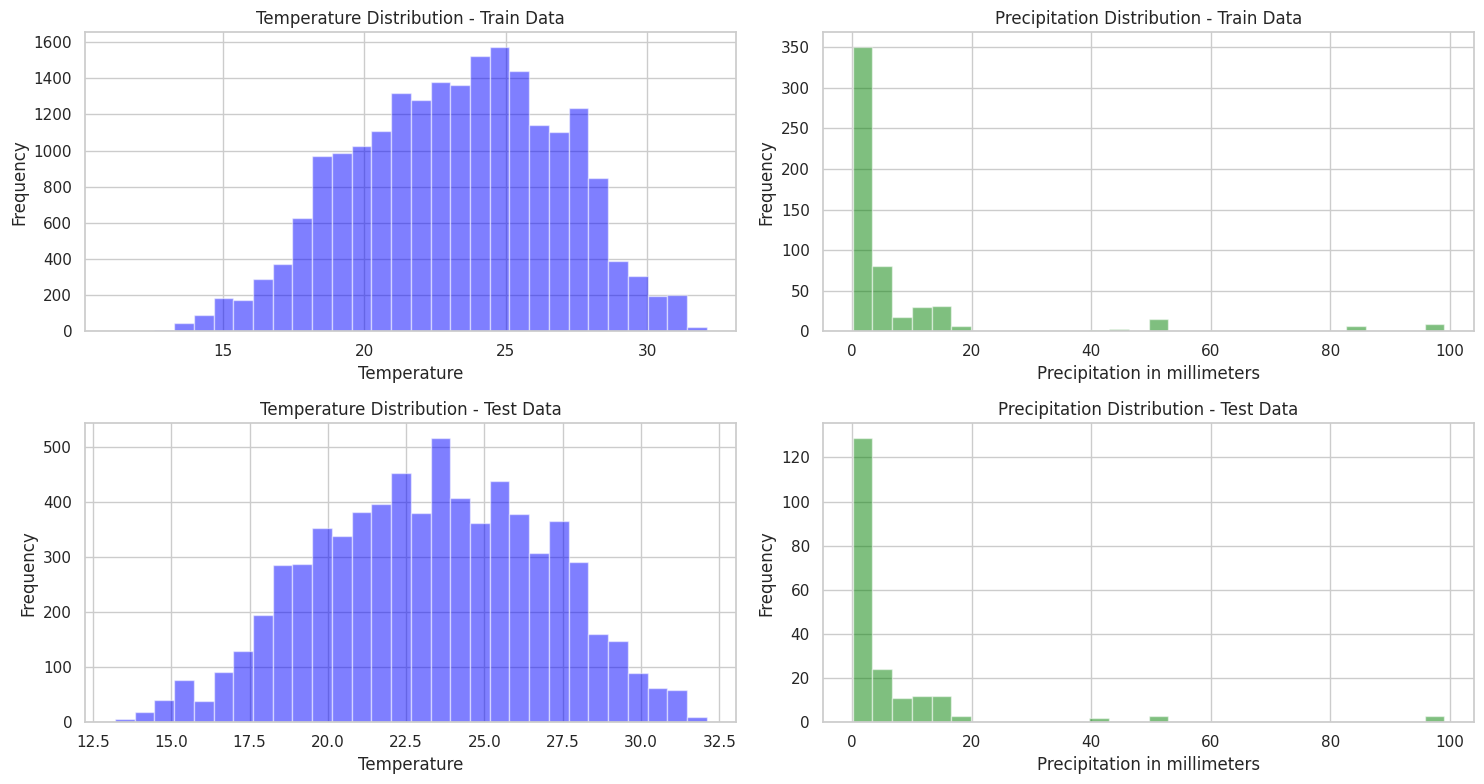

In [396]:
# Using forward fill to impute missing values in the Temperature column
def ffill_bfill(df, col):
    df[col] = df[col].ffill().bfill()
    
ffill_bfill(TrainData, 'Temperature')
ffill_bfill(TestData, 'Temperature')

# Plot temperature and precipitation distributions
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

plot_temp_precip(axes[0, 0], TrainData, 'Temperature', 30, 'blue', 'Temperature Distribution - Train Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[0, 1], TrainData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Train Data', 'Precipitation in millimeters', 'Frequency')
plot_temp_precip(axes[1, 0], TestData, 'Temperature', 30, 'blue', 'Temperature Distribution - Test Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[1, 1], TestData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Test Data', 'Precipitation in millimeters', 'Frequency')

plt.tight_layout()
plt.show()

Next, I will add a new column - RainToday From the Precipitation column - If the precipitation column has a value greater than 0, then it rained that day, else it did not rain.

In [397]:
def rain_today(df, precipitation_col, new_col = 'RainToday'):
    df[new_col] = np.where(df[precipitation_col] > 0, 'Yes', 'No')
    
rain_today(TrainData, 'Precipitation in millimeters')
rain_today(TestData, 'Precipitation in millimeters')

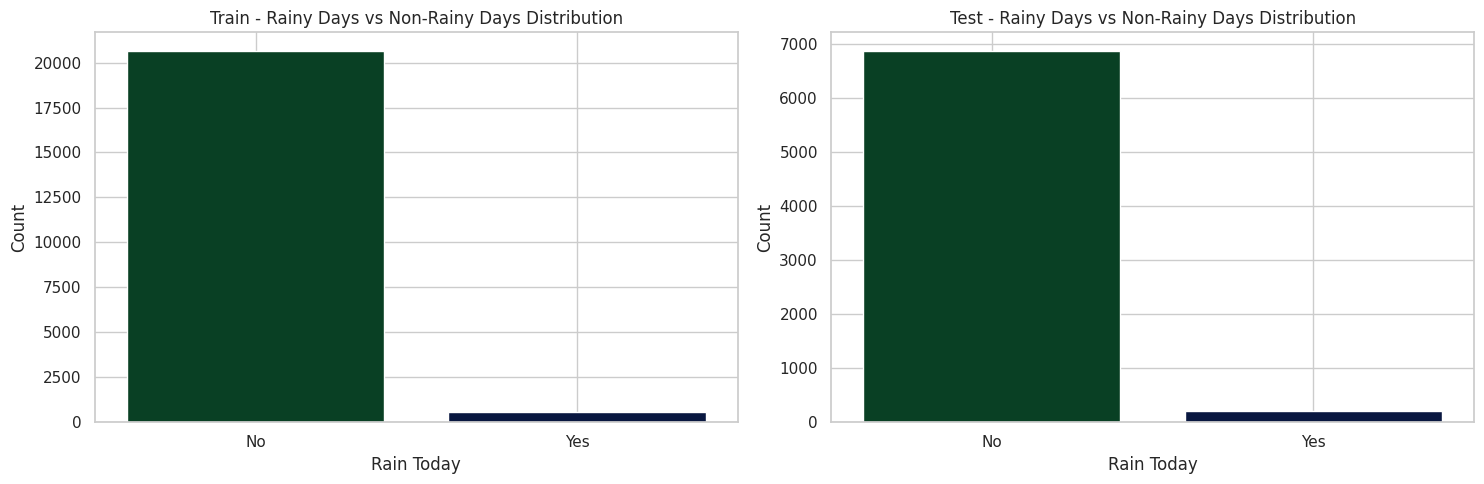

In [398]:
# Inspecting distribution of rainy and non-rainy days.

# Create subplots
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# Function to plot in both Test and Train Data
def plot_rain_distribution(axes, data, title):
    sns.countplot(data = data, x = 'RainToday', hue = 'RainToday', ax = axes, dodge = False)
    axes.set_title(title)
    axes.set_xlabel('Rain Today')
    axes.set_ylabel('Count')
    axes.grid(True)

# Plot
plot_rain_distribution(axes[0], TrainData, 'Train - Rainy Days vs Non-Rainy Days Distribution')
plot_rain_distribution(axes[1], TestData, 'Test - Rainy Days vs Non-Rainy Days Distribution')

plt.tight_layout()

plt.show()

There were few rainy days, as extracted from the precipitation column.

In [399]:
TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [400]:
TestData.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                                0
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [401]:
# Duplicated values

def is_duplicated(df):
    df.duplicated()

# Train data
duplicates = is_duplicated(TrainData)

print(duplicates)

None


In [402]:
# Test data duplicates

duplicates_test = is_duplicated(TestData)

print(duplicates_test)

None


In [403]:
# Riders data duplicates

duplicates_riders = is_duplicated(RidersData)

print(duplicates_riders)

None


In [404]:
# Data Description

TrainData['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

### Data Enrichment

In this project, data enrichment is performed using custom scripts in the src/ folder, each dedicated to extracting specific features from geographic data sources. These scripts generate features like shortest path distances, road types, and road quality, enhancing our dataset with valuable contextual information for predicting estimated time of arrival (ETA). The main.py script orchestrates this process, consolidating all enriched features into a final dataset for analysis and modeling.

In [405]:
TrainData = pd.read_csv('datasets/TrainDataEnriched.csv')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,RainToday,Road Quality,Shortest Path Distance,Pickup Road Type
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,No,paved,2946.192,residential
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,No,paved,15641.870,tertiary
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,No,paved,2879.938,secondary
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,No,paved,6204.453,secondary
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,No,paved,6131.896,residential


In [406]:
TrainData.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'RainToday', 'Road Quality',
       'Shortest Path Distance', 'Pickup Road Type'],
      dtype='object')

In [407]:
TestData = pd.read_csv('datasets/TestDataEnriched.csv')

TestData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,RainToday,Road Quality,Shortest Path Distance,Pickup Road Type
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,No,unknown,7504.655,trunk_link
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,No,paved,5258.212,residential
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,No,paved,4654.151,secondary
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,No,paved,3474.872,secondary
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,No,paved,3638.848,trunk


In [408]:
TestData.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'RainToday', 'Road Quality', 'Shortest Path Distance',
       'Pickup Road Type'],
      dtype='object')

In [409]:
TrainData[['Order No', 'Shortest Path Distance', 'Pickup Road Type', 'Road Quality']].head()

,Order No,Shortest Path Distance,Pickup Road Type,Road Quality
0,Order_No_4211,2946.192,residential,paved
1,Order_No_25375,15641.870,tertiary,paved
2,Order_No_1899,2879.938,secondary,paved
3,Order_No_9336,6204.453,secondary,paved
4,Order_No_27883,6131.896,residential,paved


In [410]:
TestData[['Order No', 'Shortest Path Distance', 'Pickup Road Type', 'Road Quality']].head()

,Order No,Shortest Path Distance,Pickup Road Type,Road Quality
0,Order_No_19248,7504.655,trunk_link,unknown
1,Order_No_12736,5258.212,residential,paved
2,Order_No_768,4654.151,secondary,paved
3,Order_No_15332,3474.872,secondary,paved
4,Order_No_21373,3638.848,trunk,paved


### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Platform Type'}>,
        <AxesSubplot:title={'center':'Placement - Day of Month'}>,
        <AxesSubplot:title={'center':'Placement - Weekday (Mo = 1)'}>,
        <AxesSubplot:title={'center':'Confirmation - Day of Month'}>],
       [<AxesSubplot:title={'center':'Confirmation - Weekday (Mo = 1)'}>,
        <AxesSubplot:title={'center':'Arrival at Pickup - Day of Month'}>,
        <AxesSubplot:title={'center':'Arrival at Pickup - Weekday (Mo = 1)'}>,
        <AxesSubplot:title={'center':'Pickup - Day of Month'}>],
       [<AxesSubplot:title={'center':'Pickup - Weekday (Mo = 1)'}>,
        <AxesSubplot:title={'center':'Arrival at Destination - Day of Month'}>,
        <AxesSubplot:title={'center':'Arrival at Destination - Weekday (Mo = 1)'}>,
        <AxesSubplot:title={'center':'Distance (KM)'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Precipitation in millimeters'}>,
        <AxesSubplot:title={

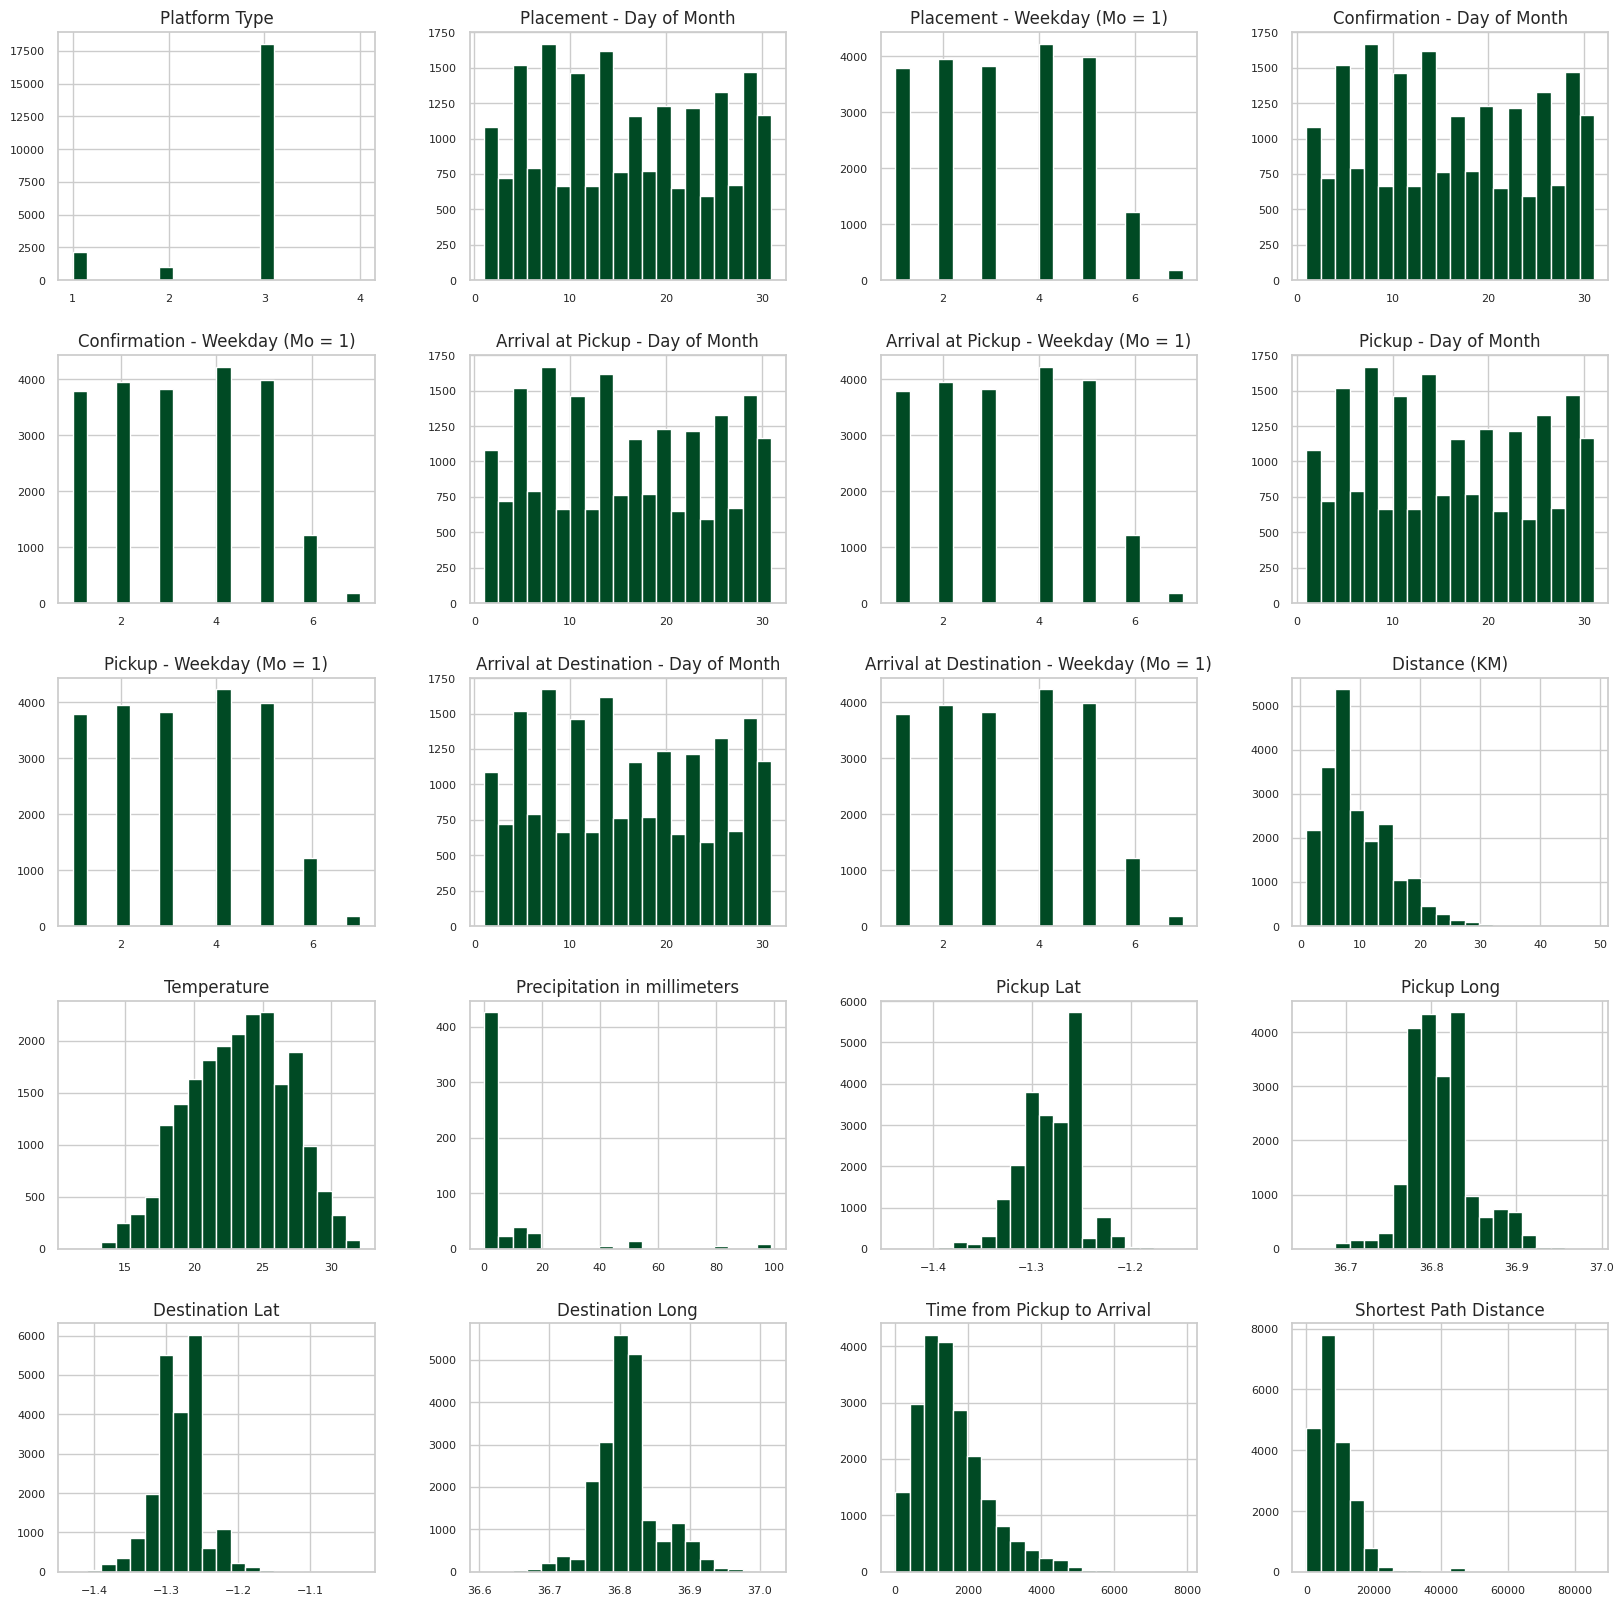

In [411]:
TrainData.hist(figsize = (20, 20), bins = 20, xlabelsize = 8, ylabelsize = 8)

The majority of orders are associated with Platform Type 3, while the other types have relatively low counts. Orders are distributed fairly evenly across the days of the month, with a slight variation in counts. There is a higher number of orders from Monday to Friday, with a drop on weekends, especially Sunday. Similar to placement, confirmation days are evenly distributed across the month. Confirmation follows a similar pattern to placement, with more confirmations on weekdays and a sharp drop on Sunday. The arrival days are evenly distributed, indicating consistent activity across the month. Arrival at pickup is higher on weekdays, with lower activity on Sundays. The distribution is relatively even, with orders picked up on most days of the month. Pickups are more frequent on weekdays, dropping on weekends, especially on Sunday. Similar distribution as previous day-of-month variables, showing activity across the month. Like other weekday variables, arrivals are more frequent from Monday to Friday, with fewer on weekends.

The majority of trips cover shorter distances, with a sharp decrease in frequency as distance increases. Most trips are under 10 km. Temperatures are centered around 25–30 degrees Celsius, indicating relatively warm weather. There is very low precipitation for most orders, but a few days show higher precipitation levels, indicating occasional rainy days. The time from pickup to arrival is skewed towards shorter durations, with most orders completed in under 2000 seconds. Similar to Distance (KM), most orders follow a short path, with a steep drop-off as the path distance increases.

- Activities like placement, confirmation, arrival, and pickup are evenly spread across the month, with more activity on weekdays.
- Both pickup and destination locations are concentrated within a certain latitude and longitude range.
- Most orders cover short distances and are completed relatively quickly, with a small subset covering longer distances and taking more time.
- The data shows mostly dry conditions with occasional rain, and temperatures are generally warm.

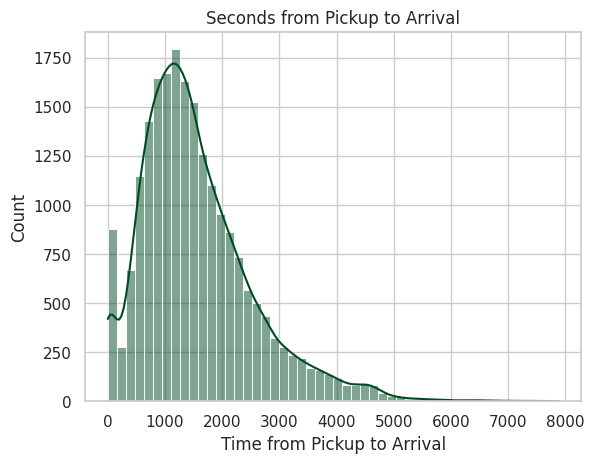

In [412]:
# What is the time taken to deliver orders?

sns.histplot(TrainData['Time from Pickup to Arrival'], bins = 50, kde = True)
plt.title('Seconds from Pickup to Arrival')
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Count')

plt.show()

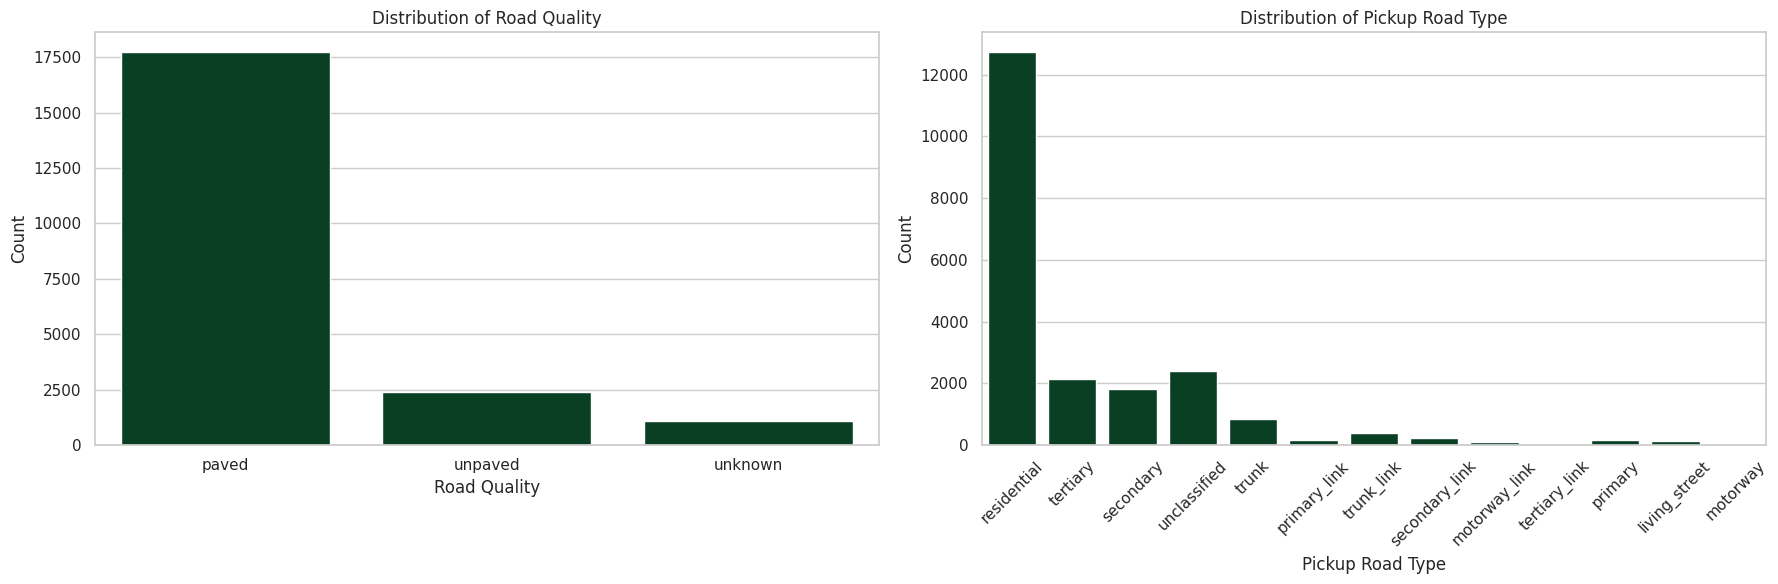

In [413]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

# Road Quality
sns.countplot(x = 'Road Quality', data = TrainData, ax = axes[0])
axes[0].set_title('Distribution of Road Quality')
axes[0].set_xlabel('Road Quality')
axes[0].set_ylabel('Count')

# Pickup Road Type
sns.countplot(x = 'Pickup Road Type', data = TrainData, ax = axes[1])
axes[1].set_title('Distribution of Pickup Road Type')
axes[1].set_xlabel('Pickup Road Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

- The majority of roads are categorized as "paved," which indicates a high presence of well-maintained or formal road infrastructure in the dataset.

- The majority of pickups are in "residential" areas, indicating that deliveries are often collected from residential locations.

#### Does the day of the week affect the time taken for deliveries? For example, are delivery times longer or shorter on busier days like Thursday?

In [414]:
sns.set(style = 'whitegrid')

sns.set_palette("ocean")

/tmp/ipykernel_1608/217035893.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = order_counts.index,


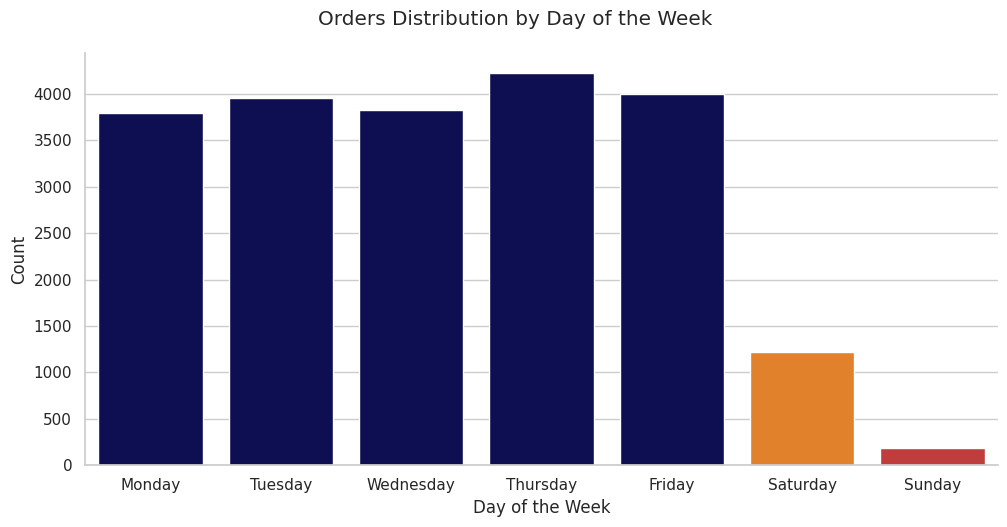

In [415]:
# How do orders vary with the day of the week?

order_counts = TrainData['Placement - Weekday (Mo = 1)'].value_counts().sort_index()

colors = ['#03045E', '#03045E', '#03045E', '#03045E', '#03045E', '#ff7f0e', '#d62728']

g = sns.catplot(x = order_counts.index, 
                y = order_counts.values, 
                kind = 'bar', 
                height = 5, 
                aspect = 2, 
                palette = colors)

# Add labels to indicate the day of the week (Monday to Sunday)
g.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

g.fig.suptitle('Orders Distribution by Day of the Week', y = 1.05)

g.set(xlabel = 'Day of the Week', ylabel = 'Count')

plt.show()

In [416]:
order_counts

Placement - Weekday (Mo = 1)
1    3789
2    3959
3    3823
4    4228
5    3993
6    1223
7     186
Name: count, dtype: int64

Thursday has the highest order count, while weekends (Saturday and Sunday) see the least number of orders, with Sunday being particularly low.

Given that weekdays, especially Thursday, have higher order volumes, it would be reasonable to hypothesize that delivery times might be longer on busier days like Thursday due to higher demand and potential logistical challenges. Conversely, delivery times on weekends may be shorter due to the lower volume of orders, assuming that rider availability and other factors remain constant.

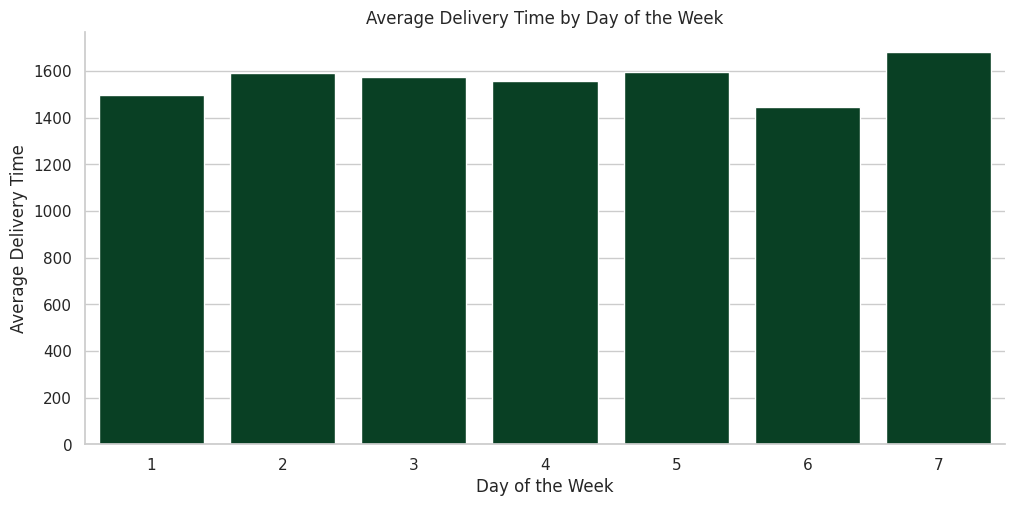

In [417]:
# What is the average delivery time for each day of the week?

# Group by the day of the week and calculate the average delivery time
avg_delivery_time = TrainData.groupby('Placement - Weekday (Mo = 1)')['Time from Pickup to Arrival'].mean()

sns.catplot(x = avg_delivery_time.index,
            y = avg_delivery_time.values,
            kind = 'bar',
            height = 5,
            aspect = 2)

plt.title('Average Delivery Time by Day of the Week')

plt.xlabel('Day of the Week')

plt.ylabel('Average Delivery Time')

plt.show()

In [418]:
avg_delivery_time

Placement - Weekday (Mo = 1)
1    1496.081288
2    1589.976257
3    1573.379545
4    1556.106197
5    1595.178813
6    1445.685200
7    1683.032258
Name: Time from Pickup to Arrival, dtype: float64

- Average delivery times are fairly consistent from Monday to Friday, with values ranging from approximately 1,496 seconds (Monday) to 1,595 seconds (Friday).

- Saturday has the shortest average delivery time at 1,445.69 seconds, likely due to the lower order volume, making it easier for riders to complete deliveries more quickly.

- Sunday has the highest average delivery time at 1,683.03 seconds, despite being the day with the lowest order volume. This could suggest limited rider availability or other logistical constraints on Sundays that impact delivery efficiency.

Despite Thursday being the peak day for order volume, the average delivery time on Thursday (1,556 seconds) does not differ significantly from other weekdays. This could imply that the logistics are managed well enough to handle the extra volume without substantial delays.

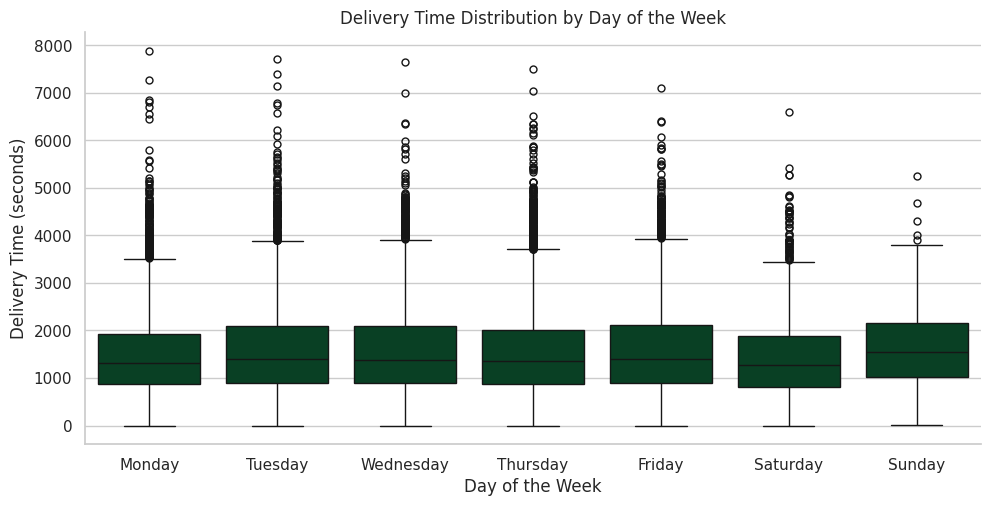

In [419]:
# Delivery time by day of the week
sns.catplot(
    x = 'Placement - Weekday (Mo = 1)', 
    y = 'Time from Pickup to Arrival', 
    data = TrainData, 
    kind = 'box', 
    height = 5, 
    aspect = 2
)

# Set the title and labels
plt.title('Delivery Time Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (seconds)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

- On Saturday, there is a slightly lower spread in delivery times compared to weekdays, which may reflect the reduced order volume allowing for more consistent delivery performance.

- Sunday shows higher variability in delivery times, with the interquartile range (IQR) appearing slightly larger and more outliers at higher delivery times. This could be due to reduced rider availability or other operational constraints on Sundays, leading to a less predictable delivery experience despite the low order volume.

- Every day has a significant number of outliers, indicating that there are consistently some deliveries that take much longer than the typical delivery time. These outliers might be influenced by factors such as traffic, road quality, or longer delivery distances.

#### Does the platform type influence the delivery time? For instance, are orders from certain platform types (like Platform Type 3) completed faster or slower than others?

In [420]:
avg_delivery_time_by_platform = TrainData.groupby('Platform Type')['Time from Pickup to Arrival'].mean()

avg_delivery_time_by_platform

Platform Type
1    1572.799721
2    1540.861224
3    1555.773402
4    1675.150000
Name: Time from Pickup to Arrival, dtype: float64

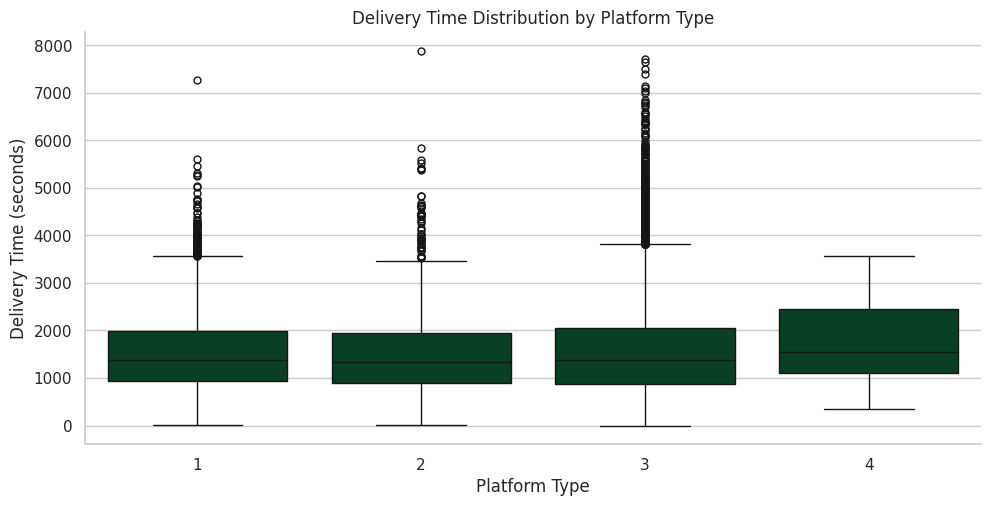

In [421]:
sns.catplot(x = 'Platform Type', y = 'Time from Pickup to Arrival', data = TrainData, kind = 'box', height = 5, aspect = 2)

plt.title('Delivery Time Distribution by Platform Type')

plt.xlabel('Platform Type')

plt.ylabel('Delivery Time (seconds)')

plt.show()

- Platform type does appear to influence delivery time. Platform Type 4 consistently has longer delivery times, while Types 1, 2, and 3 have shorter but more variable delivery times.

- Although slower, Platform Type 4 might provide a more reliable delivery experience with fewer outliers.

#### Are business orders completed faster than personal orders, or do they cover shorter distances on average?

In [422]:
avg_delivery_time_by_order_type = TrainData.groupby('Personal or Business')['Time from Pickup to Arrival'].mean()

avg_delivery_time_by_order_type

Personal or Business
Business    1550.743270
Personal    1585.056327
Name: Time from Pickup to Arrival, dtype: float64

In [423]:
avg_distance_by_order_type = TrainData.groupby('Personal or Business')['Distance (KM)'].mean()

avg_distance_by_order_type

Personal or Business
Business    9.525598
Personal    9.419701
Name: Distance (KM), dtype: float64

/tmp/ipykernel_1608/1907037087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1608/1907037087.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


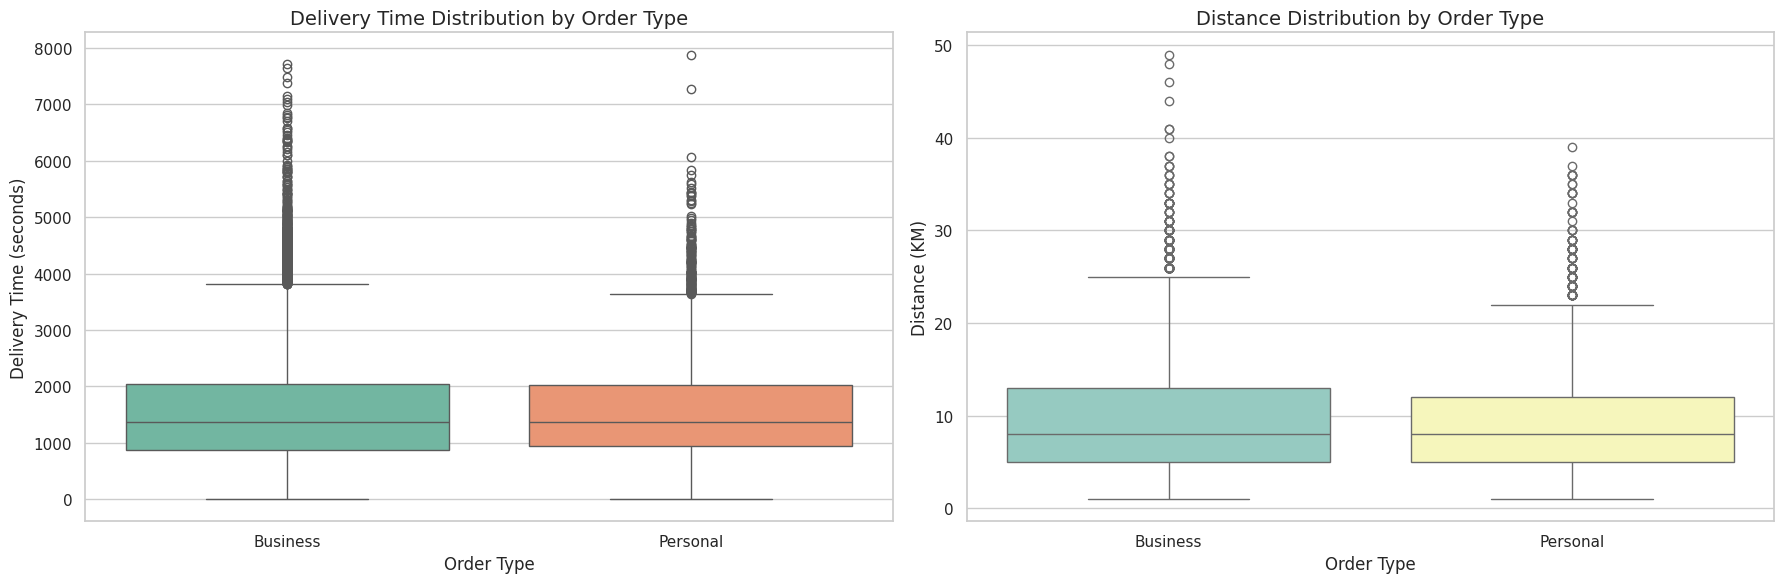

In [424]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(
    x = 'Personal or Business',
    y = 'Time from Pickup to Arrival',
    data = TrainData,
    ax = axes[0],
    palette = "Set2"
)

axes[0].set_title('Delivery Time Distribution by Order Type', fontsize = 14)
axes[0].set_xlabel('Order Type', fontsize = 12)
axes[0].set_ylabel('Delivery Time (seconds)', fontsize = 12)

sns.boxplot(
    x = 'Personal or Business',
    y = 'Distance (KM)',
    data = TrainData,
    ax = axes[1],
    palette = "Set3"
)

axes[1].set_title('Distance Distribution by Order Type', fontsize = 14)
axes[1].set_xlabel('Order Type', fontsize = 12)
axes[1].set_ylabel('Distance (KM)', fontsize = 12)

plt.tight_layout()  
plt.show()

- Business orders have a slightly shorter average delivery time (1,550.74 seconds) compared to personal orders (1,585.06 seconds). The difference is small, suggesting that while business orders may be completed marginally faster, the effect might not be substantial.

- Business orders have a slightly higher average distance (9.53 km) compared to personal orders (9.42 km). The difference is minimal, indicating that both business and personal orders tend to cover similar distances.

#### Does the time taken for deliveries vary across different days of the month, perhaps due to changes in order volume or other factors?

/tmp/ipykernel_1608/1120246952.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


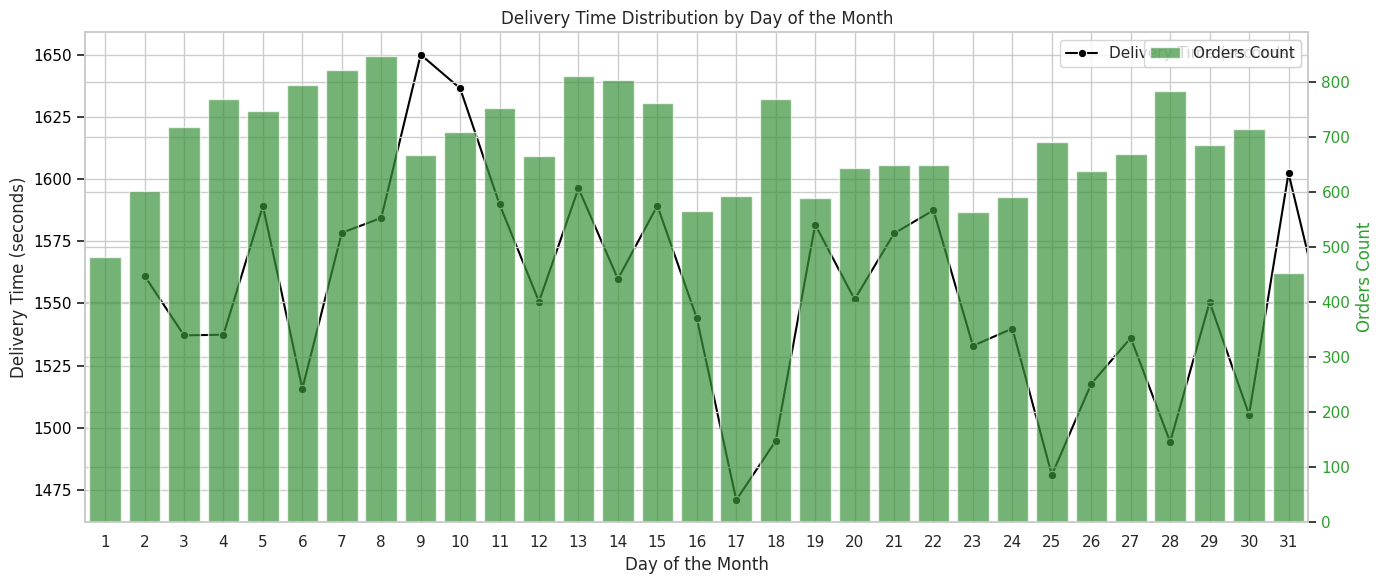

In [425]:
# Plotting the distribution of delivery time by day of the month
fig, ax1 = plt.subplots(figsize=(14, 6))

# Line plot for Delivery Time Distribution
sns.lineplot(
    x = 'Placement - Day of Month',
    y = 'Time from Pickup to Arrival',
    data = TrainData,
    ax = ax1,
    marker = 'o',
    color = 'black',
    label = 'Delivery Time (seconds)',
    ci = None
)
ax1.set_xlabel('Day of the Month')
ax1.set_ylabel('Delivery Time (seconds)')
ax1.set_title('Delivery Time Distribution by Day of the Month')
ax1.tick_params(axis = 'y', labelcolor = 'black')

ax2 = ax1.twinx()

daily_orders = TrainData['Placement - Day of Month'].value_counts().sort_index()

sns.barplot(
    x = daily_orders.index,
    y = daily_orders.values,
    ax = ax2,
    color = 'tab:green',
    alpha = 0.7,
    label = 'Orders Count'
)
ax2.set_ylabel('Orders Count', color = 'tab:green')
ax2.tick_params(axis = 'y', labelcolor = 'tab:green')

plt.tight_layout()
plt.show()

- There are certain days where delivery times seem relatively higher, such as around the 6th to the 8th day of the month, and again around the 15th and 27th to 28th day. 
- The number of orders remains fairly consistent throughout the month, with some slight variations (e.g., peaks around the 8th, 14th, 18th, and 28th day).
- The delivery time appears to be relatively stable regardless of the changes in order volume, implying that other factors like rider availability, road quality, weather conditions, or other operational efficiencies may play a significant role in maintaining consistent delivery times.

#### Is there a relationship between rider ratings and the number of orders they complete? Do highly-rated riders complete more orders?

In [426]:
# Joining the Rider data to the Train data on the 'Rider Id' column
TrainData = pd.merge(TrainData, RidersData, how = 'left', on = 'Rider Id')

TestData = pd.merge(TestData, RidersData, how = 'left', on = 'Rider Id')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Rider Id,Time from Pickup to Arrival,RainToday,Road Quality,Shortest Path Distance,Pickup Road Type,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,Rider_Id_432,745,No,paved,2946.192,residential,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,Rider_Id_856,1993,No,paved,15641.870,tertiary,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,Rider_Id_155,455,No,paved,2879.938,secondary,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,Rider_Id_855,1341,No,paved,6204.453,secondary,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,Rider_Id_770,1214,No,paved,6131.896,residential,2311,872,14.1,533


#### Do rider ratings correlate with delivery speed, i.e., do higher-rated riders complete deliveries faster?

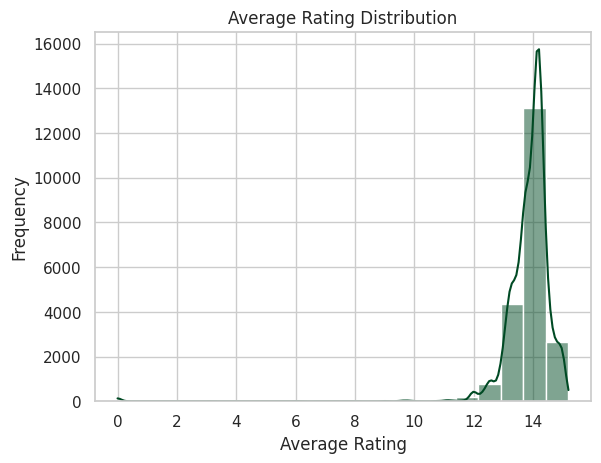

In [427]:
# What is the distribution of ratings?

sns.histplot(TrainData['Average_Rating'], bins = 20, kde = True)

plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()

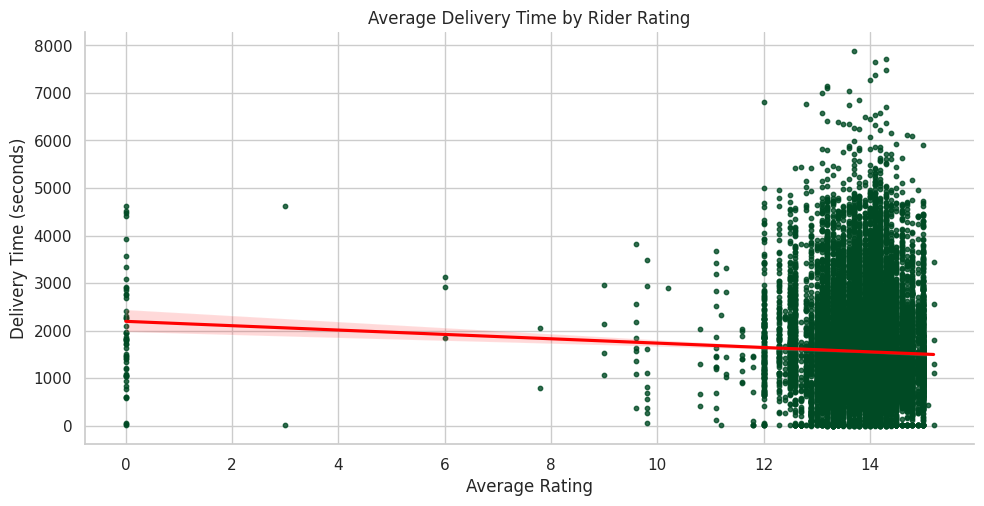

In [428]:
# Average delivery time by rider rating distribution
sns.lmplot(x = 'Average_Rating', y = 'Time from Pickup to Arrival', data = TrainData,height = 5, aspect = 2, scatter_kws = {'s': 10}, line_kws = {'color': 'red'})

plt.title('Average Delivery Time by Rider Rating')

plt.xlabel('Average Rating')

plt.ylabel('Delivery Time (seconds)')

plt.show()

In [429]:
# Checking for instances where time is less than 60 seconds

def is_less_than_60_seconds(df, col):
    return df[col] < 60

total_true_train = is_less_than_60_seconds(TrainData, 'Time from Pickup to Arrival')

print(total_true_train.sum())

740


Here, I check the distribution's summary statistics can help identify the range and common values.

In [430]:
print(TrainData['Time from Pickup to Arrival'].describe())

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64


I am subsetting the low delivery time orders to further explore them.

In [431]:
short_time_orders = TrainData[TrainData['Time from Pickup to Arrival'] < 60]

short_time_orders

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Rider Id,Time from Pickup to Arrival,RainToday,Road Quality,Shortest Path Distance,Pickup Road Type,No_Of_Orders,Age,Average_Rating,No_of_Ratings
36,Order_No_9676,User_Id_393,Bike,3,Business,28,1,11:47:23 AM,28,1,...,Rider_Id_619,2,No,paved,2341.024,residential,7056,2047,13.3,411
52,Order_No_27809,User_Id_3326,Bike,3,Business,13,4,4:16:05 PM,13,4,...,Rider_Id_536,4,No,paved,555.300,residential,1926,994,13.8,482
81,Order_No_4823,User_Id_2929,Bike,3,Business,11,2,11:44:46 AM,11,2,...,Rider_Id_185,14,No,paved,4011.099,trunk,9140,2323,13.9,1256
86,Order_No_23720,User_Id_391,Bike,3,Business,23,2,1:00:31 PM,23,2,...,Rider_Id_613,4,No,paved,2229.397,residential,365,269,13.8,40
126,Order_No_6027,User_Id_1469,Bike,3,Business,21,5,12:41:58 PM,21,5,...,Rider_Id_793,16,No,unpaved,3867.208,unclassified,2564,1217,13.3,629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21065,Order_No_20998,User_Id_81,Bike,3,Business,21,4,10:34:19 AM,21,4,...,Rider_Id_354,5,No,paved,1836.153,residential,1130,1715,13.3,303
21085,Order_No_24557,User_Id_393,Bike,3,Business,25,1,11:37:33 AM,25,1,...,Rider_Id_25,5,No,paved,2341.024,residential,613,460,12.5,65
21101,Order_No_21938,User_Id_2174,Bike,3,Business,27,1,1:34:32 PM,27,1,...,Rider_Id_86,4,No,paved,9877.654,residential,1133,2006,14.1,178
21105,Order_No_27247,User_Id_302,Bike,3,Business,16,6,7:24:39 PM,16,6,...,Rider_Id_314,27,No,paved,8392.704,residential,201,306,12.6,21


I start by investigating the relationship between short delivery times and other features. I will create various plots.

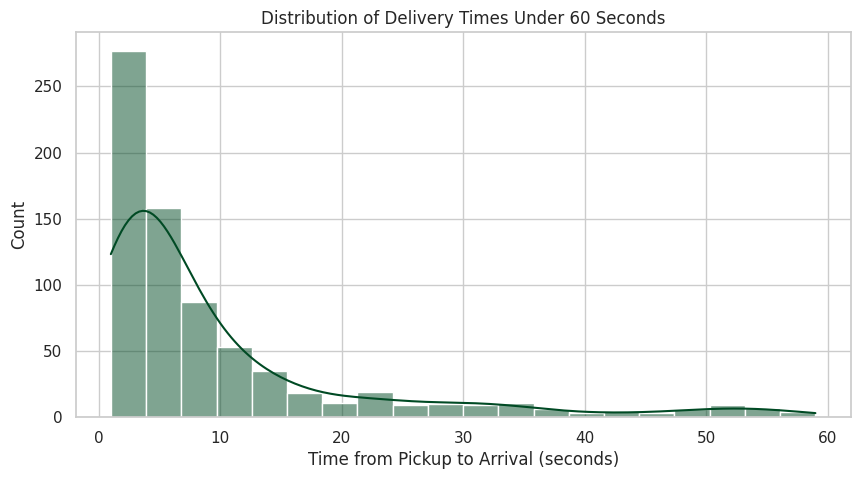

       Distance (KM)  Time from Pickup to Arrival
count     740.000000                   740.000000
mean        6.417568                     9.886486
std         4.601872                    12.122763
min         1.000000                     1.000000
25%         3.000000                     3.000000
50%         5.000000                     5.000000
75%         9.000000                    11.000000
max        26.000000                    59.000000


In [432]:
# Plot the histogram

plt.figure(figsize = (10, 5))

sns.histplot(short_time_orders['Time from Pickup to Arrival'], bins = 20, kde = True)

plt.title('Distribution of Delivery Times Under 60 Seconds')
plt.xlabel('Time from Pickup to Arrival (seconds)')
plt.ylabel('Count')
plt.show()

print(short_time_orders[['Distance (KM)', 'Time from Pickup to Arrival']].describe())

In [433]:
# Further exploring a sample of orders with delivery time under 60 seconds

short_time_orders[['Order No', 'Distance (KM)', 'Pickup - Time', 'Arrival at Destination - Time', 'Time from Pickup to Arrival']].head(10)

,Order No,Distance (KM),Pickup - Time,Arrival at Destination - Time,Time from Pickup to Arrival
36,Order_No_9676,4,1:35:48 PM,1:35:50 PM,2
52,Order_No_27809,3,5:14:41 PM,5:14:45 PM,4
81,Order_No_4823,5,1:51:06 PM,1:51:20 PM,14
86,Order_No_23720,4,1:47:23 PM,1:47:27 PM,4
126,Order_No_6027,4,1:23:54 PM,1:24:10 PM,16
159,Order_No_6734,10,12:56:29 PM,12:56:49 PM,20
168,Order_No_27461,5,11:39:13 AM,11:39:21 AM,8
263,Order_No_8781,3,11:27:34 AM,11:27:47 AM,13
301,Order_No_22371,9,5:18:12 PM,5:18:14 PM,2
304,Order_No_22600,1,1:10:39 PM,1:10:51 PM,12


In [434]:
# Finding cases where the time is less than 60 seconds but the distance is greater than 0.5 km (arbitrary threshold for investigation)
suspicious_orders = short_time_orders[short_time_orders['Distance (KM)'] > 0.5]

suspicious_orders[['Order No', 'Distance (KM)', 'Time from Pickup to Arrival']].head(10)

,Order No,Distance (KM),Time from Pickup to Arrival
36,Order_No_9676,4,2
52,Order_No_27809,3,4
81,Order_No_4823,5,14
86,Order_No_23720,4,4
126,Order_No_6027,4,16
159,Order_No_6734,10,20
168,Order_No_27461,5,8
263,Order_No_8781,3,13
301,Order_No_22371,9,2
304,Order_No_22600,1,12


In [435]:
# Check for instances where the distance covered was less than 100 meters

def is_less_than_0_kilometers(df, col):
    return df[col] < 0.1

total = is_less_than_0_kilometers(TrainData, 'Distance (KM)')

print(total.sum())

0


During the exploratory data analysis of time taken distribution, several issues were discovered in the dataset that may impact the quality and accuracy of subsequent analyses and model predictions:

- There are multiple instances where the recorded "Time from Pickup to Arrival" is less than 60 seconds for significant distances (e.g., 4 km, 9 km). These values are highly unrealistic, indicating potential data entry errors, system glitches, or the presence of test/demo data.

- In some records, the "Pickup Time" and "Arrival Time" are almost simultaneous, despite non-trivial distances being covered. This suggests issues in the timestamp logging or calculation process.

- The dataset contains cases where the distance covered is substantial, but the corresponding delivery time is extremely short. This inconsistency indicates possible anomalies in the data collection or data processing stages.

We will proceed for general inconsistencies in the following categories:

- The "Pickup Time" always precedes the "Arrival at Destination Time." Any violations of this rule indicate a data entry error.
- Calculate the time difference between key events (e.g., confirmation to pickup, pickup to arrival) and check for unusually short or long durations.
- Analyze the correlation between "Distance (KM)" and "Time from Pickup to Arrival." A low or negative correlation could indicate anomalies in the data.

In [436]:
# Removing instances where the time is less than 60 seconds but the distance is greater than 0.5 km
TrainDataCleaned = TrainData[~TrainData['Order No'].isin(suspicious_orders['Order No'])]

# Remove instances where time is less than 60 seconds
TrainDataCleaned = TrainData[~TrainData['Order No'].isin(short_time_orders['Order No'])]

In [437]:
# Convert date-time columns to datetime objects in the train dataset
datetime_columns = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']
for col in datetime_columns:
    if col in TrainDataCleaned.columns:
        TrainDataCleaned.loc[:, col] = pd.to_datetime(TrainDataCleaned[col], format = '%I:%M:%S %p').dt.time

# Convert date-time columns to datetime objects in the test dataset
datetime_columns_test = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']
for col in datetime_columns_test:
    if col in TestData.columns:
        TestData.loc[:, col] = pd.to_datetime(TestData[col], format = '%I:%M:%S %p').dt.time

In [438]:
TrainDataCleaned[['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']].head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55
1,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22
2,12:39:25,12:42:44,12:49:34,12:53:03,13:00:38
3,09:25:34,09:26:05,09:37:56,09:43:06,10:05:27
4,09:55:18,09:56:18,10:03:53,10:05:23,10:25:37


In [439]:
# Checking instances where the earlier time is greater than the later time

time_cols = [
        'Placement - Time',
        'Confirmation - Time',
        'Arrival at Pickup - Time',
        'Pickup - Time',
        'Arrival at Destination - Time'
    ]

inconsistent_times = TrainDataCleaned[
    (TrainDataCleaned['Placement - Time'] > TrainDataCleaned['Confirmation - Time']) |
    (TrainDataCleaned['Confirmation - Time'] > TrainDataCleaned['Arrival at Pickup - Time']) |
    (TrainDataCleaned['Arrival at Pickup - Time'] > TrainDataCleaned['Pickup - Time']) |
    (TrainDataCleaned['Pickup - Time'] > TrainDataCleaned['Arrival at Destination - Time'])
]

print("Inconsistent times: ",)
inconsistent_times[['Order No', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']].head(20)

Inconsistent times: 


,Order No,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
3173,Order_No_27041,17:47:00,17:46:34,17:47:02,17:56:10,18:02:02
4024,Order_No_2800,14:34:37,13:16:53,13:59:45,14:01:52,14:45:52
6805,Order_No_7504,13:28:33,13:27:51,13:41:55,13:49:44,14:14:00
10597,Order_No_1271,10:30:40,10:30:39,10:38:04,10:44:54,11:08:31
11083,Order_No_4442,09:30:05,09:29:52,09:38:48,09:51:11,09:59:30
16331,Order_No_19517,13:45:32,13:45:20,13:45:26,13:47:43,14:22:49


In [440]:
# Removing inconsistent time instances

TrainDataCleaned = TrainDataCleaned[~TrainDataCleaned['Order No'].isin(inconsistent_times['Order No'])]

#### Is there a significant difference between the shortest path distance and the actual distance covered? If so, does this affect the delivery time?

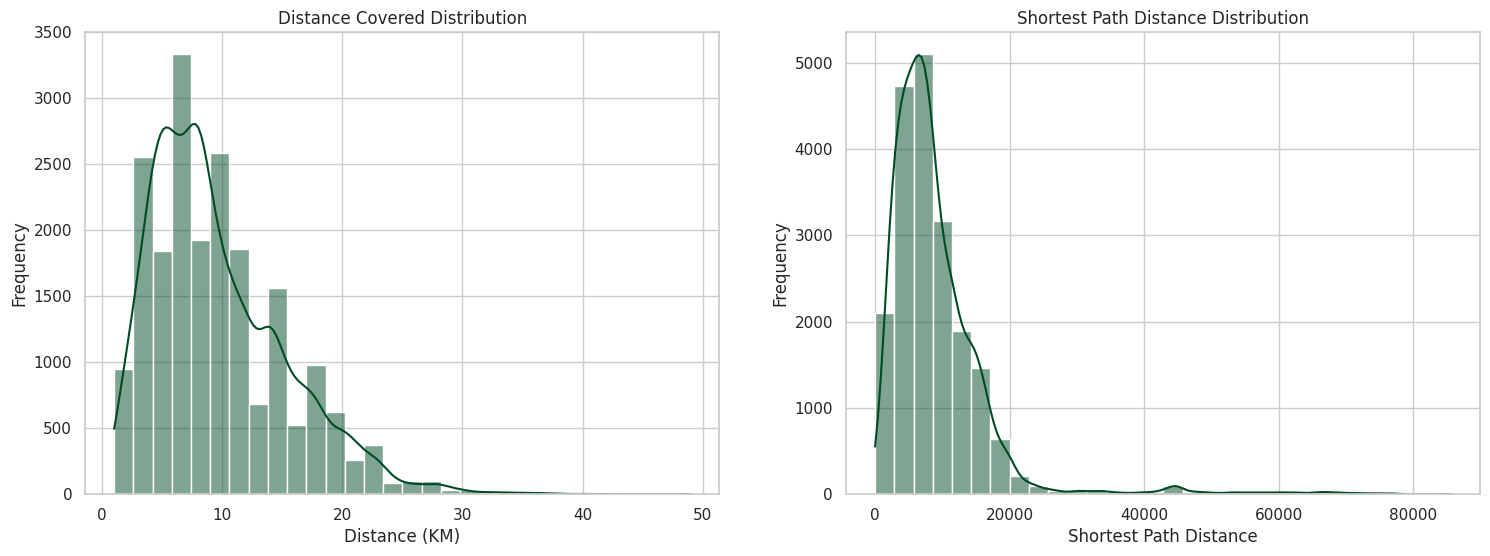

In [443]:
# Subplots - Distance covered and shortest path distance

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

sns.histplot(TrainDataCleaned['Distance (KM)'], bins = 30, kde = True, ax = axes[0])
axes[0].set_title('Distance Covered Distribution')
axes[0].set_xlabel('Distance (KM)')
axes[0].set_ylabel('Frequency')

sns.histplot(TrainDataCleaned['Shortest Path Distance'], bins = 30, kde = True, ax = axes[1])
axes[1].set_title('Shortest Path Distance Distribution')
axes[1].set_xlabel('Shortest Path Distance')
axes[1].set_ylabel('Frequency')

plt.show()

In [444]:
from scipy import stats

# Perform a paired t-test
# Convert Shortest Path Distance from meters to kilometers
TrainDataCleaned['Shortest Path Distance (KM)'] = TrainDataCleaned['Shortest Path Distance'] / 1000

# Recalculate the difference
TrainDataCleaned['Distance Difference'] = TrainDataCleaned['Distance (KM)'] - TrainDataCleaned['Shortest Path Distance (KM)']

# Drop any rows with NaN values in relevant columns before the t-test
TrainData_cleaned = TrainDataCleaned.dropna(subset=['Distance (KM)', 'Shortest Path Distance (KM)'])

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(TrainData_cleaned['Distance (KM)'], TrainData_cleaned['Shortest Path Distance (KM)'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 6.748793827454608, P-value: 1.5318506193838024e-11


- The T-statistic: 6.78 represents how many standard deviations the difference between the means of Distance (KM) and Shortest Path Distance (KM) is from zero. A higher t-statistic suggests a larger difference between the means. The P-value: 1.53e-11 is extremely small, which is much less than the typical significance level (e.g., 0.05). This means we can reject the null hypothesis.

- Since the p-value is much smaller than 0.05, there is a statistically significant difference between the shortest path distance and the actual distance covered. The positive t-statistic indicates that, on average, the actual distance is greater than the shortest path distance, implying that routes taken may include deviations from the shortest or most efficient path.

- The differences may be attributed to factors such as traffic conditions, road quality, road closures, or other constraints that force riders to deviate from the shortest path. These deviations could impact delivery times, as longer distances may require more time to cover.

#### How does weather (e.g., rain or temperature) impact delivery time?

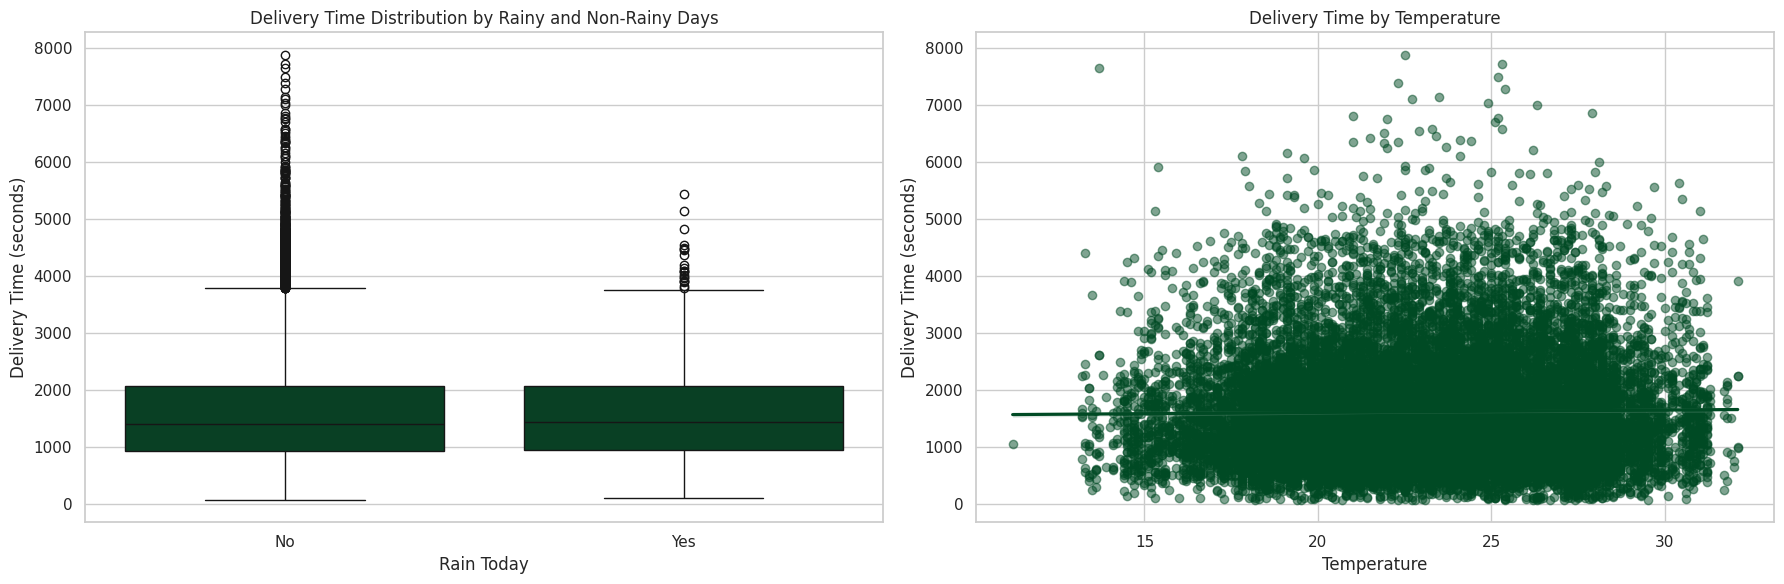

In [451]:
# Weather impact on delivery time (rain or temperature)

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

sns.boxplot(
    x = 'RainToday',
    y = 'Time from Pickup to Arrival',
    data = TrainDataCleaned,
    ax = axes[0]
)
axes[0].set_title('Delivery Time Distribution by Rainy and Non-Rainy Days')
axes[0].set_xlabel('Rain Today')
axes[0].set_ylabel('Delivery Time (seconds)')

sns.regplot(
    x = 'Temperature',
    y = 'Time from Pickup to Arrival',
    data = TrainDataCleaned,
    scatter_kws = {'alpha': 0.5},
    ax = axes[1]
)
axes[1].set_title('Delivery Time by Temperature')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Delivery Time (seconds)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plot
plt.show()

Rain and temperature do not seem to affect delivery times significantly. Notably, there is a wide variation in delivery times when there is no rain. In contrast, delivery times take less time when there is rain (< 6000 seconds). This could be due to fewer orders during rainy days, leading to faster delivery times.

In [452]:
# Statistical tests
rainy_days = TrainDataCleaned[TrainDataCleaned['RainToday'] == 'Yes']['Time from Pickup to Arrival']
non_rainy_days = TrainDataCleaned[TrainDataCleaned['RainToday'] == 'No']['Time from Pickup to Arrival']

t_stat, p_value = stats.ttest_ind(rainy_days, non_rainy_days, equal_var = False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.17772723190333095, P-value: 0.8590002929735236


- From the p-value, > 0.05, there is no statistically significant difference in the mean delivery times between rainy and non-rainy days. In other words, rain does not appear to have a significant impact on delivery time based on this test. The t-statistic (0.1777) is close to zero, further indicating that there is very little difference between the means of the two groups (rainy vs. non-rainy days).

- However, while rain alone does not seem to impact delivery time significantly, it may still have an interactive effect with other factors (e.g., road quality, time of day).

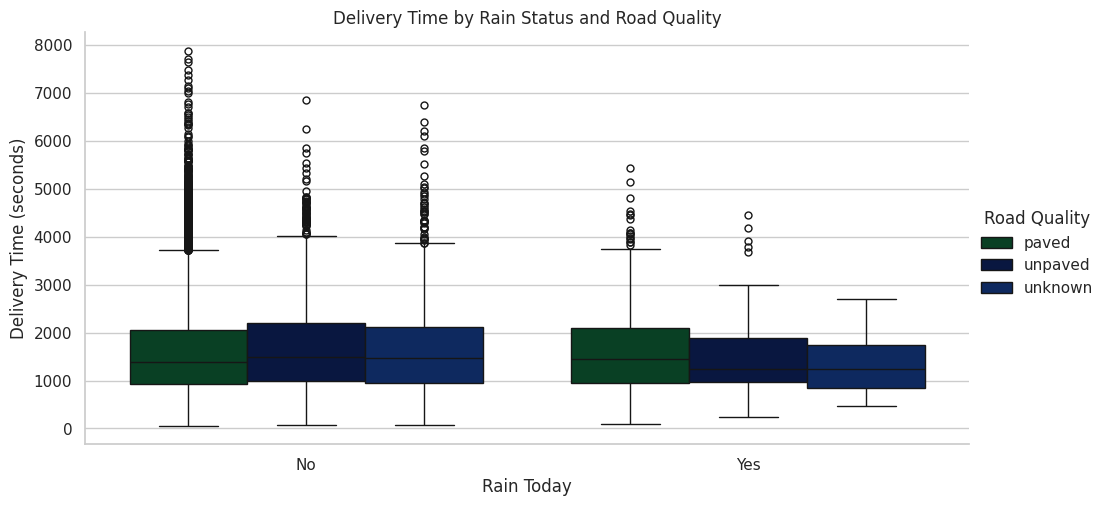

In [456]:
# Further exploring the impact of road quality on delivery time
sns.catplot(
    x = 'RainToday',
    y = 'Time from Pickup to Arrival',
    hue = 'Road Quality',
    data = TrainDataCleaned,
    kind = 'box',
    height = 5,
    aspect = 2
)

plt.title('Delivery Time by Rain Status and Road Quality')
plt.xlabel('Rain Today')
plt.ylabel('Delivery Time (seconds)')

plt.show()


- The interaction between rain and road quality does seem to have an effect, especially on unpaved roads where rain increases delivery times and variability.

In [467]:
TrainDataCleaned['Road Quality'].value_counts()

Road Quality
paved      17075
unpaved     2329
unknown     1051
Name: count, dtype: int64

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

TrainDataCleaned.rename(columns={
    'Time from Pickup to Arrival': 'TimeFromPickupToArrival',
    'Road Quality': 'RoadQuality',
    'RainToday': 'RainToday'
}, inplace = True)

model = ols('TimeFromPickupToArrival ~ C(RainToday) * C(RoadQuality)', 
            data=TrainDataCleaned).fit()

anova_table = sm.stats.anova_lm(model, typ = 2)

print(anova_table)

                                   sum_sq       df         F    PR(>F)
C(RainToday)                 3.414887e+04      1.0  0.037137  0.847188
C(RoadQuality)               1.627247e+07      2.0  8.848231  0.000144
C(RainToday):C(RoadQuality)  4.487918e+06      2.0  2.440325  0.087158
Residual                     1.880352e+10  20449.0       NaN       NaN


- The significant p-value for road quality indicates that it plays an important role in determining delivery times. Paved roads generally lead to faster deliveries, regardless of weather.
- Rain alone does not appear to have a significant impact on delivery times, likely because the delivery service is well-prepared to handle rainy conditions or because rain events were not severe enough to cause major delays.
- Although the interaction effect is not statistically significant at the 5% level, the p-value of 0.0872 suggests a potential trend. Rain might have a more pronounced impact on unpaved roads, but the effect is not strong enough across the entire dataset to be conclusive.

In [464]:
import scipy
import statsmodels
print(f"SciPy version: {scipy.__version__}")
print(f"statsmodels version: {statsmodels.__version__}")

SciPy version: 1.7.3
statsmodels version: 0.14.4


#### How strong is the correlation between distance and time? Can we assume a linear relationship, or are there other factors (e.g., road quality) that impact this relationship?

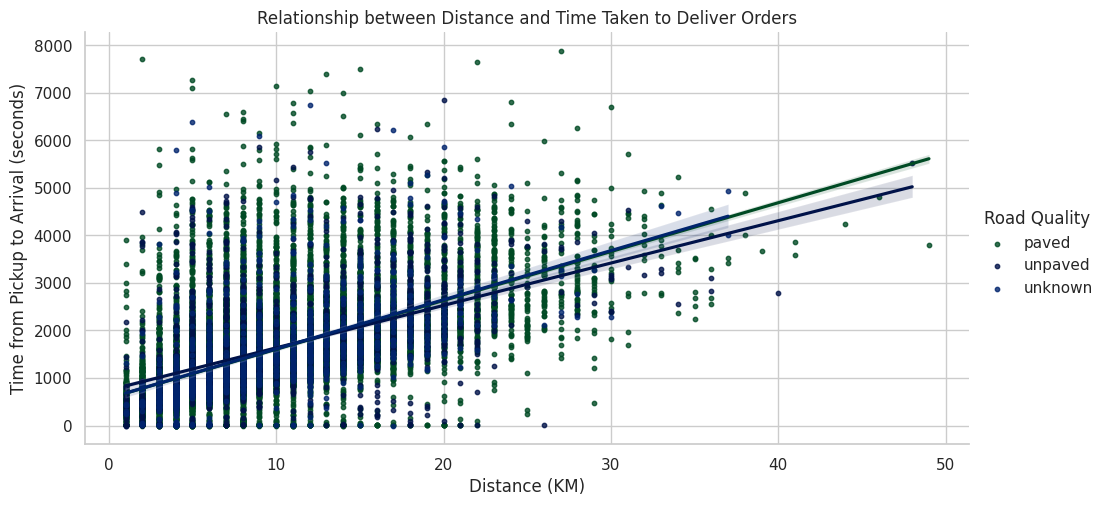

In [ ]:
# What is the relationship between the distance covered and the time taken to deliver orders?

sns.lmplot(x = 'Distance (KM)', y = 'Time from Pickup to Arrival', hue = 'Road Quality',
            data = TrainDataCleaned, height = 5, aspect = 2, scatter_kws = {'s': 10})

plt.title('Relationship between Distance and Time Taken to Deliver Orders')
plt.xlabel('Distance (KM)')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

There is a positive relationship between distance and time taken to deliver an order, where longer distances generally correspond to longer delivery times.

In [193]:
print(short_time_orders[['Distance (KM)', 'Time from Pickup to Arrival']].describe())

       Distance (KM)  Time from Pickup to Arrival
count     740.000000                   740.000000
mean        6.417568                     9.886486
std         4.601872                    12.122763
min         1.000000                     1.000000
25%         3.000000                     3.000000
50%         5.000000                     5.000000
75%         9.000000                    11.000000
max        26.000000                    59.000000


- The mean distance is 6.4 km, which, while not extremely short, suggests that these are likely regular delivery distances. For real-world delivery, a 6.4 km trip would normally take much longer than just 9.9 seconds.

- The minimum to max distance ranges from 1 km to 26 km. Even the minimum 1 km distance would typically take longer than a second for bike deliveries. The time ranges from 1 second to 59 seconds, which is extremely short for the average 6.4 km distance.

- The 25th percentile for time is 3 seconds, the median is 5 seconds, and the 75th percentile is 11 seconds. This indicates that even the majority of these “short-time” deliveries are quite fast, considering the average and quartile distances covered.

Given these findings, it's likely that the very short times (e.g., 1-11 seconds) are anomalous. They don’t align with expected travel times, even if the distances were very short (like 1 km). These could represent data entry errors or instances where timestamps were not properly recorded, leading to unrealistic values.

#### Does rain (or poor weather conditions) significantly affect delivery times? Are deliveries slower on days when it rains?

#### Does road quality influence delivery time? Do riders take longer to complete orders in areas with poor road quality?

#### Do the pickup road type influence delivery time? Are orders picked up on highways completed faster than those picked up on residential roads?

#### Would rainy days affect riders deliveries? Would riders avoid accepting orders on rainy days or on unpaved roads due to potential delays?

#### How do certain geographical areas affect delivery times? Are some areas associated with longer delivery times due to traffic congestion or other factors?

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,1900-01-01 09:35:46,1900-01-01 09:40:10,1900-01-01 10:04:47,1900-01-01 10:27:30,1900-01-01 10:39:55
1,1900-01-01 11:16:16,1900-01-01 11:23:21,1900-01-01 11:40:22,1900-01-01 11:44:09,1900-01-01 12:17:22
2,1900-01-01 12:39:25,1900-01-01 12:42:44,1900-01-01 12:49:34,1900-01-01 12:53:03,1900-01-01 13:00:38
3,1900-01-01 09:25:34,1900-01-01 09:26:05,1900-01-01 09:37:56,1900-01-01 09:43:06,1900-01-01 10:05:27
4,1900-01-01 09:55:18,1900-01-01 09:56:18,1900-01-01 10:03:53,1900-01-01 10:05:23,1900-01-01 10:25:37


In [40]:
# Adding new columns for time differences in seconds

# Calculate time differences
TrainData['Time_Placement_to_Confirmation'] = (TrainData['Confirmation - Time'] - TrainData['Placement - Time']).dt.total_seconds()
TrainData['Time_Confirmation_to_Arrival_at_Pickup'] = (TrainData['Arrival at Pickup - Time'] - TrainData['Confirmation - Time']).dt.total_seconds()
TrainData['Time_Arrival_to_Pickup'] = (TrainData['Pickup - Time'] - TrainData['Arrival at Pickup - Time']).dt.total_seconds()
TrainData['Time_Pickup_to_Arrival'] = (TrainData['Arrival at Destination - Time'] - TrainData['Pickup - Time']).dt.total_seconds()

# For test set (only up to Pickup time)
TestData['Time_Placement_to_Confirmation'] = (TestData['Confirmation - Time'] - TestData['Placement - Time']).dt.total_seconds()
TestData['Time_Confirmation_to_Arrival_at_Pickup'] = (TestData['Arrival at Pickup - Time'] - TestData['Confirmation - Time']).dt.total_seconds()
TestData['Time_Arrival_to_Pickup'] = (TestData['Pickup - Time'] - TestData['Arrival at Pickup - Time']).dt.total_seconds()

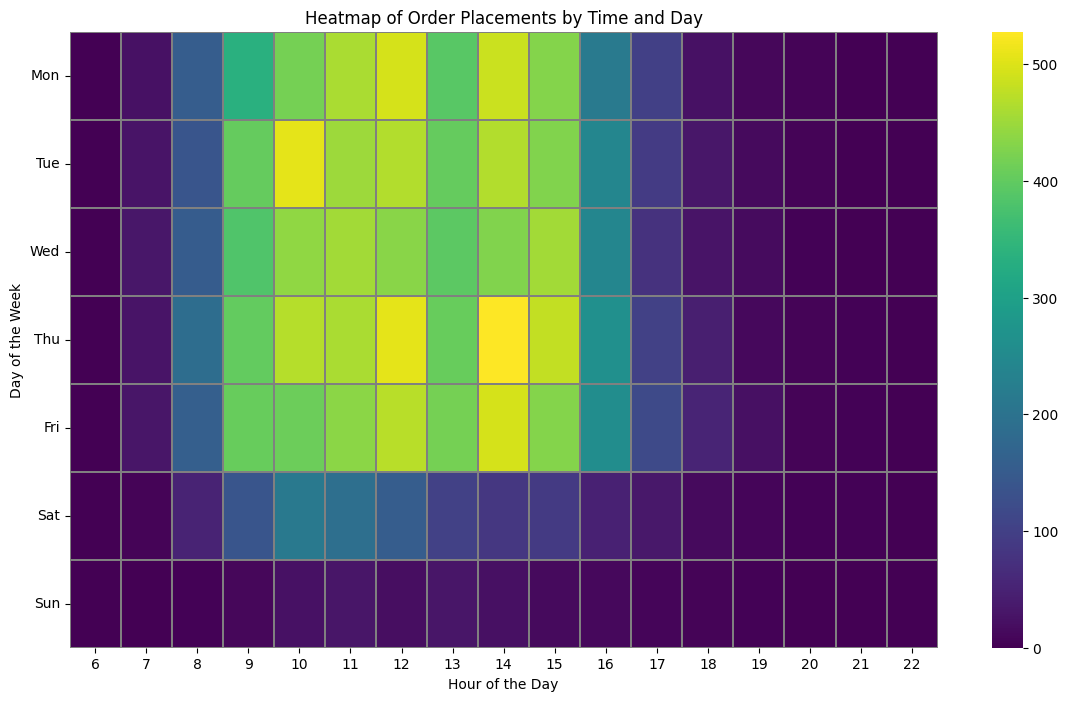

In [41]:
# What time of the day are orders placed?

# Pivot table for heatmap

heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = TrainData['Placement - Time'].dt.hour, aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, linewidths = 0.1, linecolor = 'grey')
plt.title('Heatmap of Order Placements by Time and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 0)
plt.show()

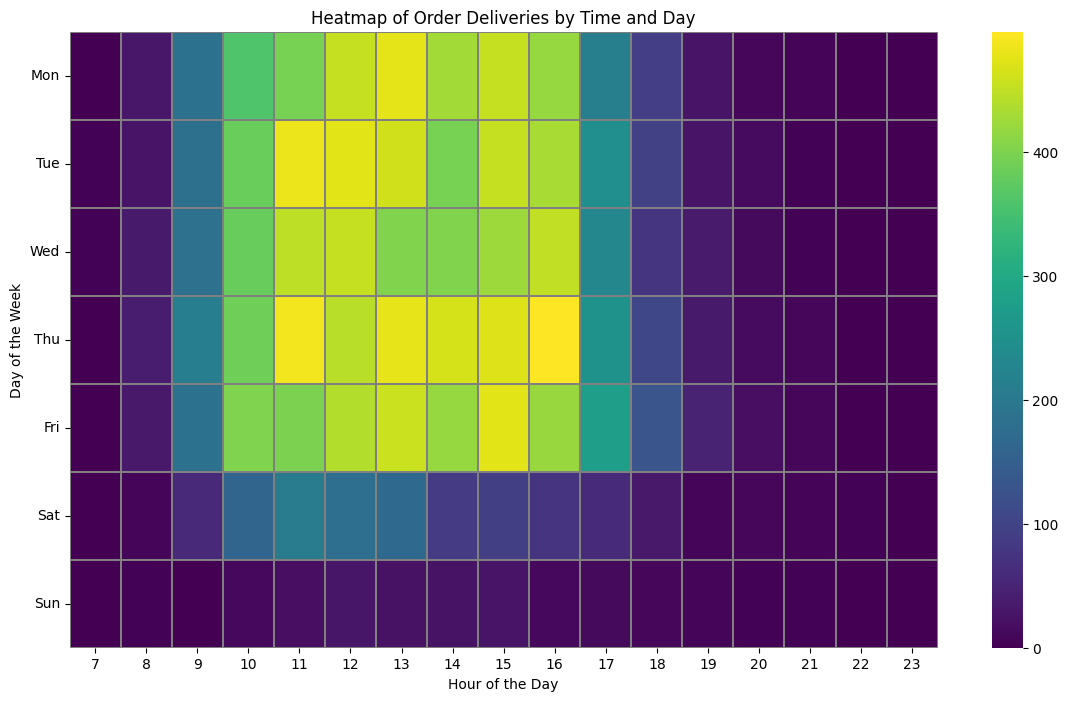

In [42]:
# What hour of the day are orders delivered?

# Pivot table for heatmap

heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = TrainData['Arrival at Destination - Time'].dt.hour, aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, linewidths = 0.1, linecolor = 'grey')
plt.title('Heatmap of Order Deliveries by Time and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 0)
plt.show()

In [43]:
TrainData.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 19691 entries, 0 to 21200
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   19691 non-null  object        
 1   User Id                                    19691 non-null  object        
 2   Vehicle Type                               19691 non-null  object        
 3   Platform Type                              19691 non-null  int64         
 4   Personal or Business                       19691 non-null  object        
 5   Placement - Day of Month                   19691 non-null  int64         
 6   Placement - Weekday (Mo = 1)               19691 non-null  int64         
 7   Placement - Time                           19691 non-null  datetime64[ns]
 8   Confirmation - Day of Month                19691 non-null  int64         
 9   Confirmation - Weekday

<Axes: >

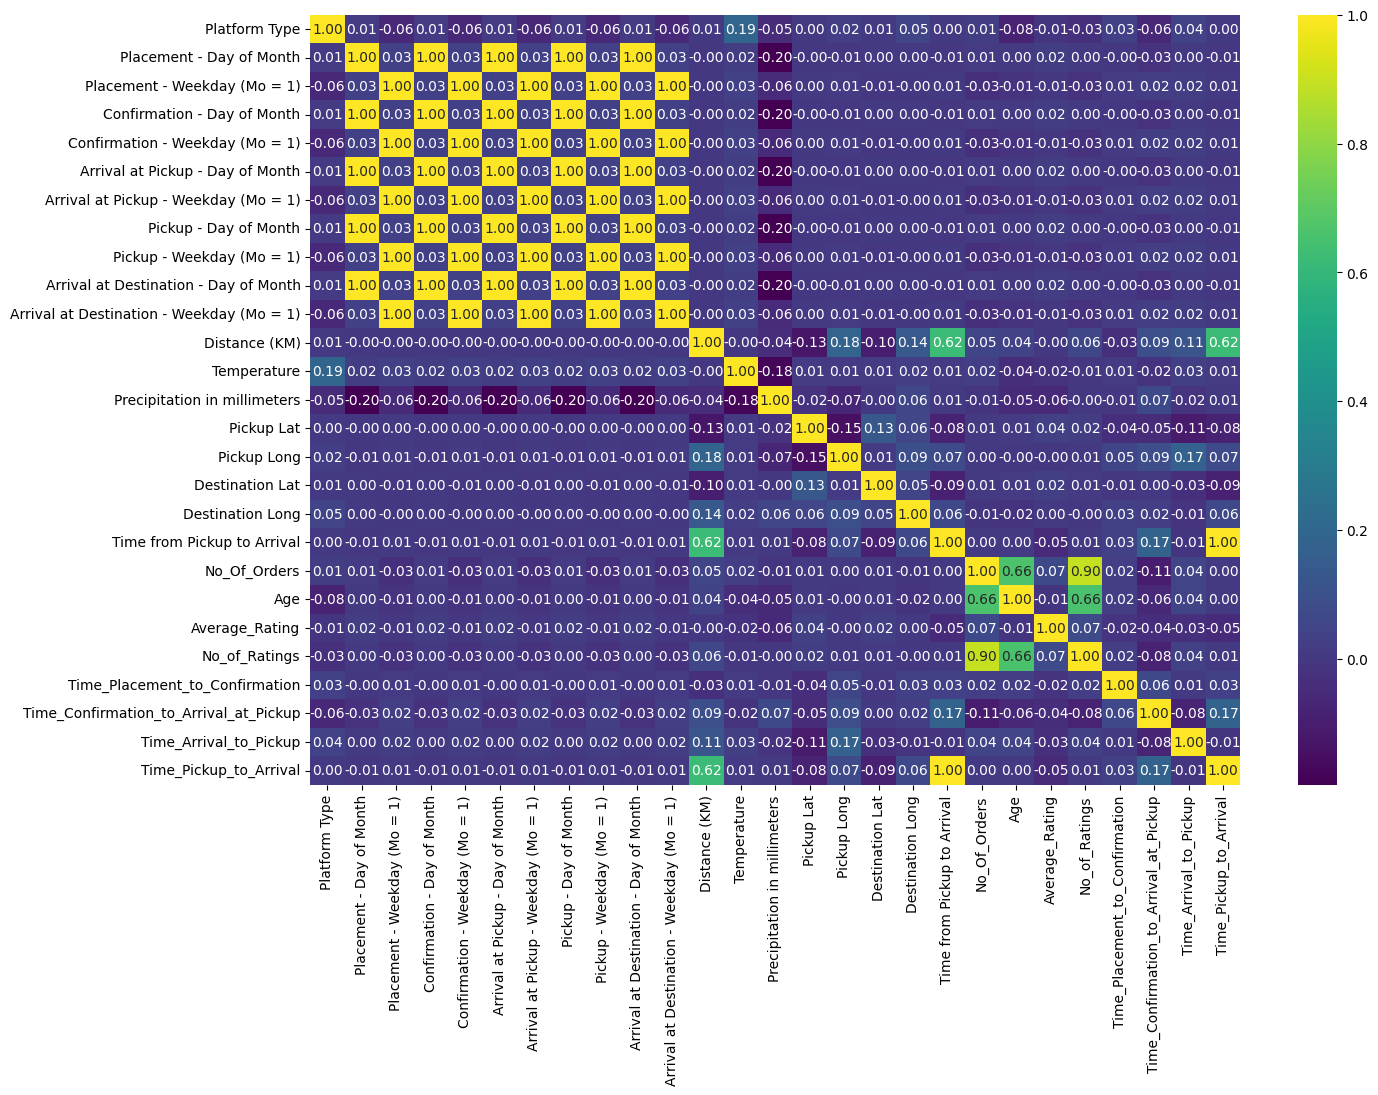

In [45]:
# Correlation matrix

plt.figure(figsize = (15, 10))

num_cols = TrainData.select_dtypes(include = ['int64', 'float64']).columns

sns.heatmap(TrainData[num_cols].corr(), annot = True, cmap = 'viridis', fmt = '.2f', cbar = True)

In [45]:
# T-Tests for numerical columns

from scipy.stats import ttest_ind

# Perform the t-test
num_cols = TrainData.select_dtypes(include = ['int64', 'float64', 'int32', 'float32']).columns

for var in num_cols:
    if var in TrainData.columns:
        # Create two groups based on the median of the target variable
        median_time = TrainData['Time from Pickup to Arrival'].median()
        group1 = TrainData[TrainData['Time from Pickup to Arrival'] <= median_time][var]
        group2 = TrainData[TrainData['Time from Pickup to Arrival'] > median_time][var]
        # Perform t-test
        t_stat, p_val = ttest_ind(group1, group2)
        print(f'T-test for {var}: t-statistic = {t_stat}, p-value = {p_val}')

T-test for Platform Type: t-statistic = -1.4927594220481073, p-value = 0.13551559257574924
T-test for Placement - Day of Month: t-statistic = 1.9597670460212446, p-value = 0.05003658027459286
T-test for Placement - Weekday (Mo = 1): t-statistic = -1.39293624173699, p-value = 0.16365420689493118
T-test for Confirmation - Day of Month: t-statistic = 1.957384766064181, p-value = 0.05031582446416231
T-test for Confirmation - Weekday (Mo = 1): t-statistic = -1.4063849355635725, p-value = 0.15962503938666353
T-test for Arrival at Pickup - Day of Month: t-statistic = 1.957384766064181, p-value = 0.05031582446416231
T-test for Arrival at Pickup - Weekday (Mo = 1): t-statistic = -1.4063849355635725, p-value = 0.15962503938666353
T-test for Pickup - Day of Month: t-statistic = 1.957384766064181, p-value = 0.05031582446416231
T-test for Pickup - Weekday (Mo = 1): t-statistic = -1.4063849355635725, p-value = 0.15962503938666353
T-test for Arrival at Destination - Day of Month: t-statistic = 1.9573

In [46]:
# Chi-Square Test for categorical columns

from scipy.stats import chi2_contingency

cat_cols = TrainData.select_dtypes(include = 'object')

# Perform the chi-square test
for var in cat_cols:
    if var in TrainData.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(TrainData['Time from Pickup to Arrival'], TrainData[var])
        # Perform chi-square test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-square test for {var}: chi2-statistic = {chi2_stat}, p-value = {p_val}')

Chi-square test for Order No: chi2-statistic = 82130453.99999496, p-value = 0.37704678046049694
Chi-square test for User Id: chi2-statistic = 12371200.582194949, p-value = 1.0
Chi-square test for Vehicle Type: chi2-statistic = 0.0, p-value = 1.0
Chi-square test for Personal or Business: chi2-statistic = 3782.333239403389, p-value = 0.9957257605911372
Chi-square test for Rider Id: chi2-statistic = 4015377.771377363, p-value = 0.0
Chi-square test for RainToday: chi2-statistic = 3975.0370211399218, p-value = 0.6659755736628313


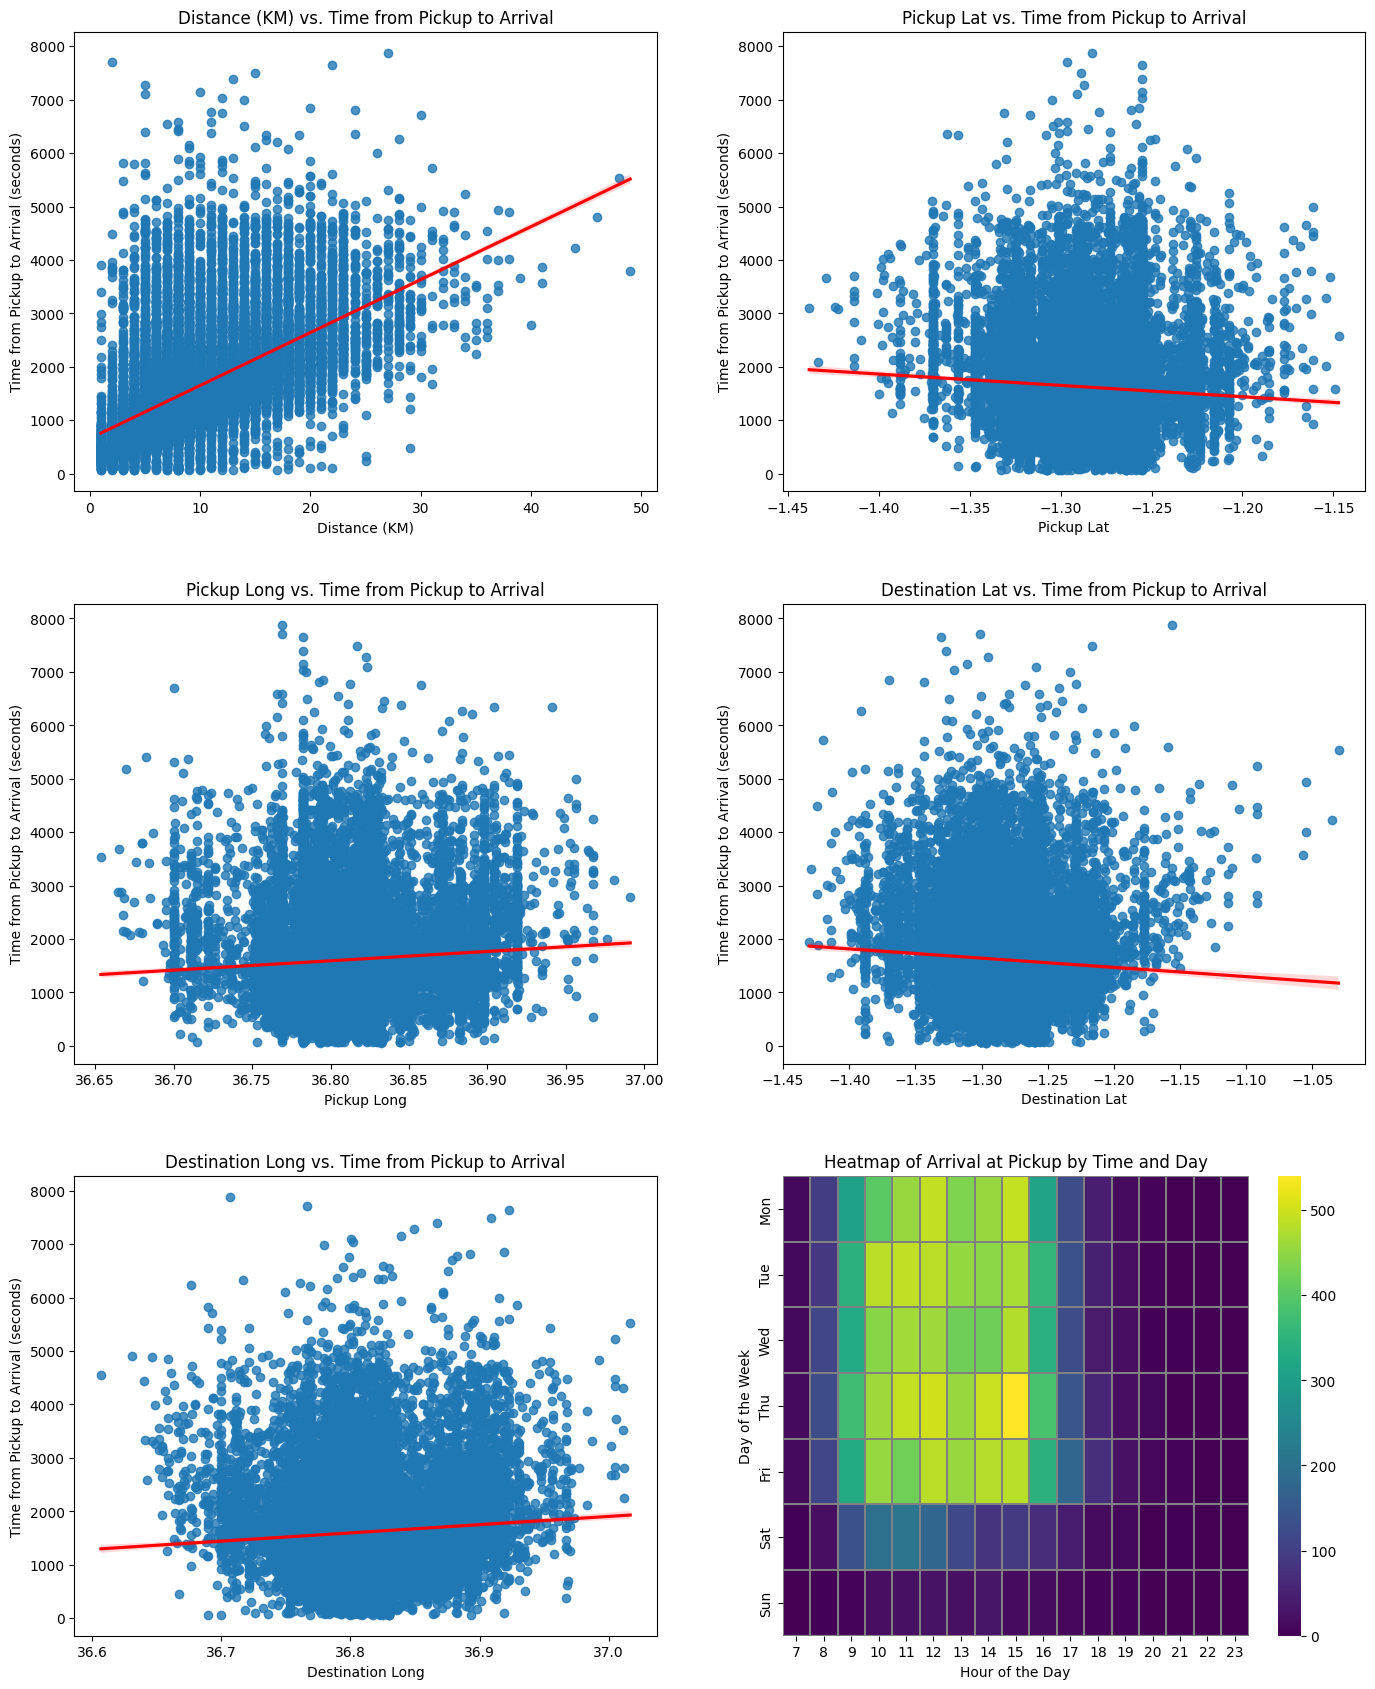

In [47]:
# Understanding and exploring key variables in the dataset

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 18))
fig.tight_layout(pad = 6.0)

# Distance (KM) vs. Time from Pickup to Arrival
sns.regplot(x = 'Distance (KM)', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[0, 0], line_kws = {'color': 'red'})
axes[0, 0].set_title('Distance (KM) vs. Time from Pickup to Arrival')
axes[0, 0].set_xlabel('Distance (KM)')
axes[0, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pickup Lat vs. Time from Pickup to Arrival
sns.regplot(x = 'Pickup Lat', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[0, 1], line_kws = {'color': 'red'})
axes[0, 1].set_title('Pickup Lat vs. Time from Pickup to Arrival')
axes[0, 1].set_xlabel('Pickup Lat')
axes[0, 1].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pickup Long vs. Time from Pickup to Arrival
sns.regplot(x = 'Pickup Long', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[1, 0], line_kws = {'color': 'red'})
axes[1, 0].set_title('Pickup Long vs. Time from Pickup to Arrival')
axes[1, 0].set_xlabel('Pickup Long')
axes[1, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Destination Lat vs. Time from Pickup to Arrival
sns.regplot(x = 'Destination Lat', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[1, 1], line_kws = {'color': 'red'})
axes[1, 1].set_title('Destination Lat vs. Time from Pickup to Arrival')
axes[1, 1].set_xlabel('Destination Lat')
axes[1, 1].set_ylabel('Time from Pickup to Arrival (seconds)')

# Destination Long vs. Time from Pickup to Arrival
sns.regplot(x = 'Destination Long', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[2, 0], line_kws = {'color': 'red'})
axes[2, 0].set_title('Destination Long vs. Time from Pickup to Arrival')
axes[2, 0].set_xlabel('Destination Long')
axes[2, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pivot table for heatmap
heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = TrainData['Arrival at Pickup - Time'].dt.hour, aggfunc = 'size', fill_value = 0)

sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, linewidths = 0.1, linecolor = 'grey', ax = axes[2, 1])
axes[2, 1].set_title('Heatmap of Arrival at Pickup by Time and Day')
axes[2, 1].set_xlabel('Hour of the Day')
axes[2, 1].set_ylabel('Day of the Week')
axes[2, 1].set_yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
                      labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()


In [37]:
TrainData_copy = TrainData.copy()

TestData_copy = TestData.copy()

In [38]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Placement - Time                           21201 non-null  datetime64[ns]
 8   Confirmation - Day of Month                21201 non-null  int64         
 9   Confirmation - We

In [39]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Order No                                7068 non-null   object        
 1   User Id                                 7068 non-null   object        
 2   Vehicle Type                            7068 non-null   object        
 3   Platform Type                           7068 non-null   int64         
 4   Personal or Business                    7068 non-null   object        
 5   Placement - Day of Month                7068 non-null   int64         
 6   Placement - Weekday (Mo = 1)            7068 non-null   int64         
 7   Placement - Time                        7068 non-null   datetime64[ns]
 8   Confirmation - Day of Month             7068 non-null   int64         
 9   Confirmation - Weekday (Mo = 1)         7068 non-nul

In [40]:
TrainData_copy = TrainData.copy()

TestData_copy = TestData.copy()

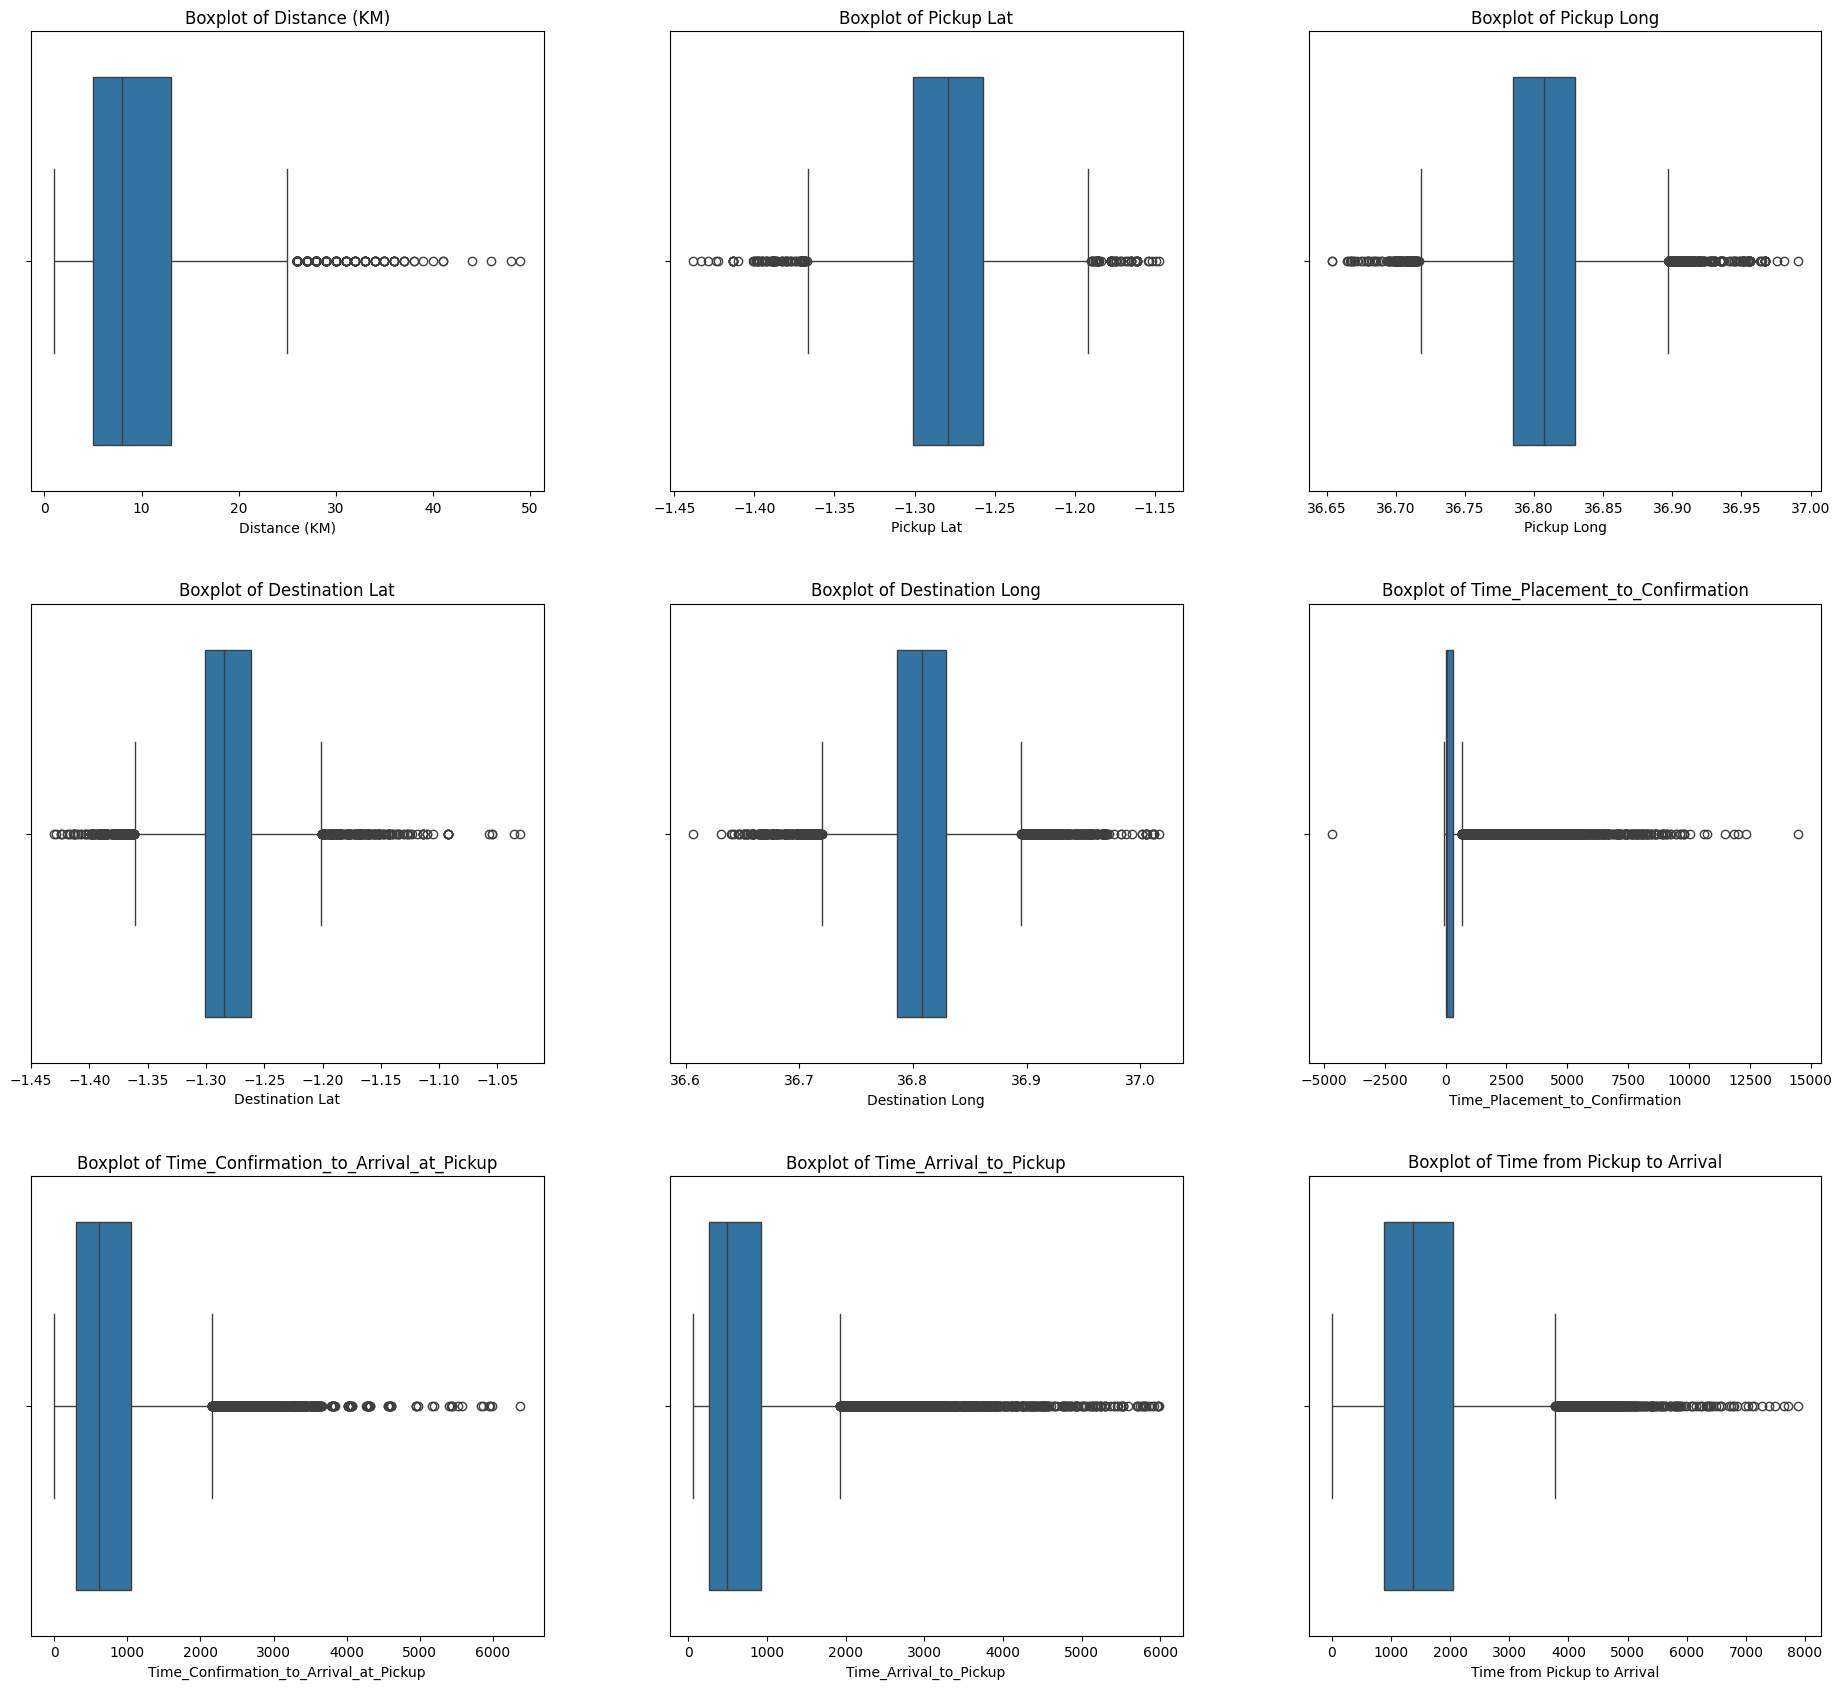

In [41]:
# Select best variables
selected_features = [
    'Distance (KM)', 'Pickup Lat', 'Pickup Long', 
    'Destination Lat', 'Destination Long', 
    'Time_Placement_to_Confirmation', 
    'Time_Confirmation_to_Arrival_at_Pickup', 
    'Time_Arrival_to_Pickup', 'Time from Pickup to Arrival'
]

def identify_outliers(df, cols):
    """
    Identify outliers in the dataset
    """
    outliers = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers.append(outlier)
    return outliers

# Identify outliers in the selected features
outliers = identify_outliers(TrainData_copy, selected_features)

# visualizing outliers
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 18))
fig.tight_layout(pad = 6.0)

for i, ax in enumerate(axes.flat):
    if i < len(selected_features):
        sns.boxplot(x = TrainData_copy[selected_features[i]], ax = ax)
        ax.set_title(f'Boxplot of {selected_features[i]}')
        ax.set_xlabel(selected_features[i])
        
plt.show()

In [42]:
# Remove outliers

def remove_outliers(df, cols):
    """
    Remove outliers from the dataset
    """
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the specified columns
TrainData_copy = remove_outliers(TrainData_copy, selected_features)

In [43]:
# Using the selected features for training

TrainData_copy = TrainData_copy[selected_features]

# For the test set, select the same features as the training set except the target variable
TestData_copy = TestData_copy[TrainData_copy.columns[:-1]]

TestData_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Distance (KM)                           7068 non-null   int64  
 1   Pickup Lat                              7068 non-null   float64
 2   Pickup Long                             7068 non-null   float64
 3   Destination Lat                         7068 non-null   float64
 4   Destination Long                        7068 non-null   float64
 5   Time_Placement_to_Confirmation          7068 non-null   float64
 6   Time_Confirmation_to_Arrival_at_Pickup  7068 non-null   float64
 7   Time_Arrival_to_Pickup                  7068 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 441.9 KB


In [44]:
TrainData_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12519 entries, 0 to 21200
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Distance (KM)                           12519 non-null  int64  
 1   Pickup Lat                              12519 non-null  float64
 2   Pickup Long                             12519 non-null  float64
 3   Destination Lat                         12519 non-null  float64
 4   Destination Long                        12519 non-null  float64
 5   Time_Placement_to_Confirmation          12519 non-null  float64
 6   Time_Confirmation_to_Arrival_at_Pickup  12519 non-null  float64
 7   Time_Arrival_to_Pickup                  12519 non-null  float64
 8   Time from Pickup to Arrival             12519 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 978.0 KB


In [45]:
from sklearn.model_selection import train_test_split

# Extract features and target from the training data
X_train = TrainData_copy.drop('Time from Pickup to Arrival', axis = 1)
y_train = TrainData_copy['Time from Pickup to Arrival']

# Extract features from the test data
X_test = TestData_copy

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

### Modeling

#### Support Vector Regression (SVR)

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
svr_model = SVR()

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = svr_model.predict(X_val)
y_test_pred = svr_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('SVR Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

SVR Model Metrics:
  Validation RMSE: 678.9845319568269
  Validation MAE: 534.6253456486014
  Validation R²: 0.015225402210352068


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Artificial Neural Networks (ANN)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the model
ann_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size = 32)

# Make predictions
y_val_pred = ann_model.predict(X_val)
y_test_pred = ann_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('ANN Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Epoch 1/100


2024-05-29 14:37:18.123254: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 1s 1ms/step - loss: 638659.0000 - mae: 619.0944 - val_loss: 433631.4375 - val_mae: 508.3436
Epoch 2/100
313/313 [==============================] - 0s 783us/step - loss: 417983.5938 - mae: 507.8495 - val_loss: 372932.3438 - val_mae: 485.2381
Epoch 3/100
313/313 [==============================] - 0s 784us/step - loss: 379204.2500 - mae: 481.0332 - val_loss: 343076.2188 - val_mae: 452.3637
Epoch 4/100
313/313 [==============================] - 0s 826us/step - loss: 352840.7500 - mae: 462.1811 - val_loss: 318895.0625 - val_mae: 422.9280
Epoch 5/100
313/313 [==============================] - 0s 826us/step - loss: 325876.0625 - mae: 440.1797 - val_loss: 335426.5938 - val_mae: 414.4261
Epoch 6/100
313/313 [==============================] - 0s 830us/step - loss: 308926.0312 - mae: 422.1633 - val_loss: 294054.2500 - val_mae: 390.7747
Epoch 7/100
313/313 [==============================] - 0s 875us/step - loss: 303959.9062 - mae: 416.2213 - val_loss: 280

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr_model = GradientBoostingRegressor(random_state = 42)

# Fit the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = gbr_model.predict(X_val)
y_test_pred = gbr_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('Gradient Boosting Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Gradient Boosting Model Metrics:
  Validation RMSE: 503.8836920483713
  Validation MAE: 370.3204950949277
  Validation R²: 0.45765245097976825


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rfr_model = RandomForestRegressor(random_state = 42)

# Fit the model
rfr_model.fit(X_train, y_train)

# Make predictions
y_val_pred = rfr_model.predict(X_val)
y_test_pred = rfr_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('Random Forest Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Random Forest Model Metrics:
  Validation RMSE: 514.7403792502303
  Validation MAE: 379.9686341853035
  Validation R²: 0.43402981615993286


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Stacked Generalization Models

In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('svr', SVR()),
    ('rf', RandomForestRegressor(random_state = 42)),
    ('gbr', GradientBoostingRegressor(random_state = 42))
]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking model
stacked_model = StackingRegressor(estimators = base_models, final_estimator = meta_model)

# Fit the model
stacked_model.fit(X_train, y_train)

# Make predictions
y_val_pred = stacked_model.predict(X_val)
y_test_pred = stacked_model.predict(X_test)

# Calculate metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print('Stacked Model Metrics:')
print(f'  Validation RMSE: {val_rmse}')
print(f'  Validation MAE: {val_mae}')
print(f'  Validation R²: {val_r2}')

Stacked Model Metrics:
  Validation RMSE: 502.60532076539715
  Validation MAE: 368.6801368269201
  Validation R²: 0.46040087110923045


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
